# Analysis - II

# <div style="color: #fff; display:fill; border-radius: 40px; background-color: #942b01; text-align: center; letter-spacing: 0.1px; overflow: hidden;padding: 20px; color: white; overflow: hidden; margin: 0; font-size: 100%">Predicting the Price of Cars with REGRESSION (cars made after 2015)
</div>

* In the previous prediction model, all the car records from all the years were utilized.
* Now, the question is what if the records of cars made beyond 2015 are considered, will this improve the accuracy and efficiency of the model.
* So, the SCOPE here is to construct a model with REGRESSION and predict the price of cars utilizing the data of cars made after 2015
* The same methodologies from the previous regression technique will be used here.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import numpy as np
import math

In [2]:
carwale_dataset = pd.read_csv(r'C:\Users\pryns\OneDrive\Documents\Python Works\zz.carwale data\02.Pre-Processing\Pre-processed Data Stage-III\carwale_dataset.csv')

* Before predicting price, its important to find how the other variables are correlated with price.
* Finding the **Pearsons' correlation coefficient r** between **_priceNumeric_** and other variables.
* all the values will be utilized to find the correlation

* includes Kilometers value 0 as those cars are unregistered

In [3]:
carwale_dataset.at[22576,'Price_(Rs)']

96000000

In [4]:
carwale_dataset.at[22576,'Price_(Rs)'] = 9600000

In [5]:
carwale_dataset.shape

(76362, 33)

In [7]:
carwale_dataset.head(2)

,profileId,Car,Kilometers,Insurance_Type,Make,Version,Year_Made,Month_Made,City,No_Of_Owners,...,Wheelbase_(mm),Width_(mm),Bootspace_(litres),Doors,Fuel_Tank_Capacity_(litres),Seating_Rows_(rows),Seating_Capacity_(persons),Fuel,Max_Power_(bhp),Max_Torque_(Nm)
0,S2725575,Mercedes-Benz GLE 300d 4MATIC LWB,6000.0,Third Party,Mercedes-Benz,300d 4MATIC LWB,2022,Apr,A&N Islands,First,...,2995.0,2157.0,630.0,5.0,93.0,2.0,5.0,Diesel,241.0,500.0
1,S2730115,Maruti Suzuki Vitara Brezza VDi (O) [2016-2018],55000.0,Comprehensive,Maruti Suzuki,VDi (O) [2016-2018],2016,Aug,A&N Islands,First,...,2500.0,1790.0,328.0,5.0,48.0,2.0,5.0,Diesel,89.0,200.0


In [6]:
carwale_dataset.describe()

,Kilometers,Year_Made,Price_(Rs),Mileage,Displacement_(cc),Max_Power_at_rpm,Max_Torque_at_rpm,Ground_Clearance_(mm),Height_(mm),Kerb_Weight_(kg),Length_(mm),Wheelbase_(mm),Width_(mm),Bootspace_(litres),Doors,Fuel_Tank_Capacity_(litres),Seating_Rows_(rows),Seating_Capacity_(persons),Max_Power_(bhp),Max_Torque_(Nm)
count,7.636200e+04,76362.000000,7.636200e+04,69084.000000,74269.000000,74151.000000,74263.000000,56543.000000,74760.000000,46633.000000,74760.000000,74756.000000,74760.000000,54270.000000,74747.000000,73428.000000,66930.000000,74756.000000,74277.000000,74277.000000
mean,6.446289e+04,2016.355517,1.121455e+06,18.897324,1505.016602,5039.017788,2869.023821,177.640541,1589.301364,1209.816804,4139.679026,2566.227661,1730.597994,359.268823,4.723226,47.578691,2.154938,5.294371,108.886357,198.758028
std,5.904772e+04,4.208153,1.754069e+06,4.491377,546.184584,1066.713739,1198.604992,17.782847,125.147516,384.033845,426.445792,174.145118,126.403085,124.471635,0.484254,13.318837,0.364932,0.778310,53.317385,120.273348
min,0.000000e+00,1900.000000,2.500000e+04,4.700000,624.000000,2800.000000,150.000000,100.000000,1165.000000,214.000000,3099.000000,1840.000000,1410.000000,80.000000,2.000000,15.000000,1.000000,2.000000,19.850000,22.000000
25%,3.134575e+04,2014.000000,3.900000e+05,15.770000,1197.000000,4000.000000,1750.000000,165.000000,1498.000000,940.000000,3815.000000,2430.000000,1680.000000,257.000000,4.000000,37.000000,2.000000,5.000000,75.000000,113.000000
50%,5.700000e+04,2017.000000,6.250000e+05,19.000000,1364.000000,5500.000000,2950.000000,170.000000,1544.000000,1099.000000,3995.000000,2520.000000,1734.000000,346.000000,5.000000,44.000000,2.000000,5.000000,89.000000,158.000000
75%,8.500000e+04,2019.000000,1.075000e+06,21.790000,1598.000000,6000.000000,4000.000000,190.000000,1665.000000,1395.000000,4445.000000,2680.000000,1810.000000,460.000000,5.000000,55.000000,2.000000,5.000000,126.000000,250.000000
max,4.950000e+06,2023.000000,5.450000e+07,140.000000,6752.000000,8400.000000,6500.000000,295.500000,2100.000000,2968.000000,5770.000000,3552.000000,2745.000000,1400.000000,5.000000,138.000000,4.000000,10.000000,660.000000,1020.000000


In [7]:
carwale_dataset.groupby(by = 'Year_Made').count()

,profileId,Car,Kilometers,Insurance_Type,Make,Version,Month_Made,City,No_Of_Owners,Price_(Rs),...,Wheelbase_(mm),Width_(mm),Bootspace_(litres),Doors,Fuel_Tank_Capacity_(litres),Seating_Rows_(rows),Seating_Capacity_(persons),Fuel,Max_Power_(bhp),Max_Torque_(Nm)
Year_Made,,,,,,,,,,,,,,,,,,,,,
1900,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1988,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,4,0,0
1991,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1993,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1994,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,2,0,0
1995,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,3,0,0
1996,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,2,0,0
1998,57,57,57,57,57,57,57,57,57,57,...,1,1,0,1,1,1,1,57,1,1
1999,36,36,36,36,36,36,36,36,36,36,...,2,2,0,2,2,0,2,36,2,2


In [10]:
carwale_dataset_og = carwale_dataset.copy()

In [379]:
carwale_dataset = carwale_dataset_og.copy()

In [8]:
carwale_dataset = carwale_dataset[carwale_dataset['Year_Made'] > 2015]

In [9]:
carwale_dataset.shape

(46576, 33)

## FINDING CORRELATION

* Finding correlation between **Price** and other variables

In [10]:
# correlation matrix of all the numeric variabls in the dataset
# is used to find which variable has a strong positve correlation with price

dataset_correlation = carwale_dataset[carwale_dataset.describe().columns]
dataset_correlation.corr()

,Kilometers,Year_Made,Price_(Rs),Mileage,Displacement_(cc),Max_Power_at_rpm,Max_Torque_at_rpm,Ground_Clearance_(mm),Height_(mm),Kerb_Weight_(kg),Length_(mm),Wheelbase_(mm),Width_(mm),Bootspace_(litres),Doors,Fuel_Tank_Capacity_(litres),Seating_Rows_(rows),Seating_Capacity_(persons),Max_Power_(bhp),Max_Torque_(Nm)
Kilometers,1.000000,-0.343736,-0.102831,0.058802,0.048177,-0.194925,-0.125870,-0.019430,0.050359,0.038485,0.025125,-0.000197,-0.011809,-0.020279,0.009282,0.038751,0.076788,0.100849,-0.049022,0.047688
Year_Made,-0.343736,1.000000,0.152538,-0.035353,-0.023637,0.131817,0.043819,0.210814,0.152684,-0.014861,0.021117,0.042063,0.088220,0.034457,0.047166,0.007393,0.078661,0.029460,0.060931,-0.016156
Price_(Rs),-0.102831,0.152538,1.000000,-0.450171,0.685673,-0.259380,-0.336485,0.229085,0.158805,0.666755,0.616672,0.670470,0.584000,0.443941,-0.156248,0.653095,0.093664,0.045244,0.832741,0.727168
Mileage,0.058802,-0.035353,-0.450171,1.000000,-0.624590,0.061998,0.140487,-0.298147,-0.371114,-0.554410,-0.565811,-0.539059,-0.509329,-0.381016,0.028048,-0.518885,-0.312195,-0.311309,-0.616162,-0.498665
Displacement_(cc),0.048177,-0.023637,0.685673,-0.624590,1.000000,-0.537991,-0.475406,0.363879,0.444371,0.875012,0.807663,0.766153,0.715879,0.532054,-0.210630,0.790418,0.397891,0.349775,0.859895,0.883699
Max_Power_at_rpm,-0.194925,0.131817,-0.259380,0.061998,-0.537991,1.000000,0.843632,-0.343506,-0.405726,-0.613884,-0.471905,-0.459186,-0.490344,-0.244180,0.035763,-0.512247,-0.336481,-0.334762,-0.363159,-0.694880
Max_Torque_at_rpm,-0.125870,0.043819,-0.336485,0.140487,-0.475406,0.843632,1.000000,-0.317857,-0.368684,-0.626511,-0.471074,-0.466414,-0.492011,-0.292823,0.073910,-0.525873,-0.239918,-0.227876,-0.459771,-0.691875
Ground_Clearance_(mm),-0.019430,0.210814,0.229085,-0.298147,0.363879,-0.343506,-0.317857,1.000000,0.661362,0.402131,0.277595,0.263789,0.475555,0.061136,0.218098,0.434538,0.314567,0.248033,0.296201,0.379595
Height_(mm),0.050359,0.152684,0.158805,-0.371114,0.444371,-0.405726,-0.368684,0.661362,1.000000,0.452119,0.281621,0.296013,0.350159,0.053442,0.298270,0.478000,0.659464,0.625491,0.237515,0.382572
Kerb_Weight_(kg),0.038485,-0.014861,0.666755,-0.554410,0.875012,-0.613884,-0.626511,0.402131,0.452119,1.000000,0.844622,0.843438,0.789670,0.542652,-0.102247,0.863462,0.402151,0.375880,0.828980,0.907621


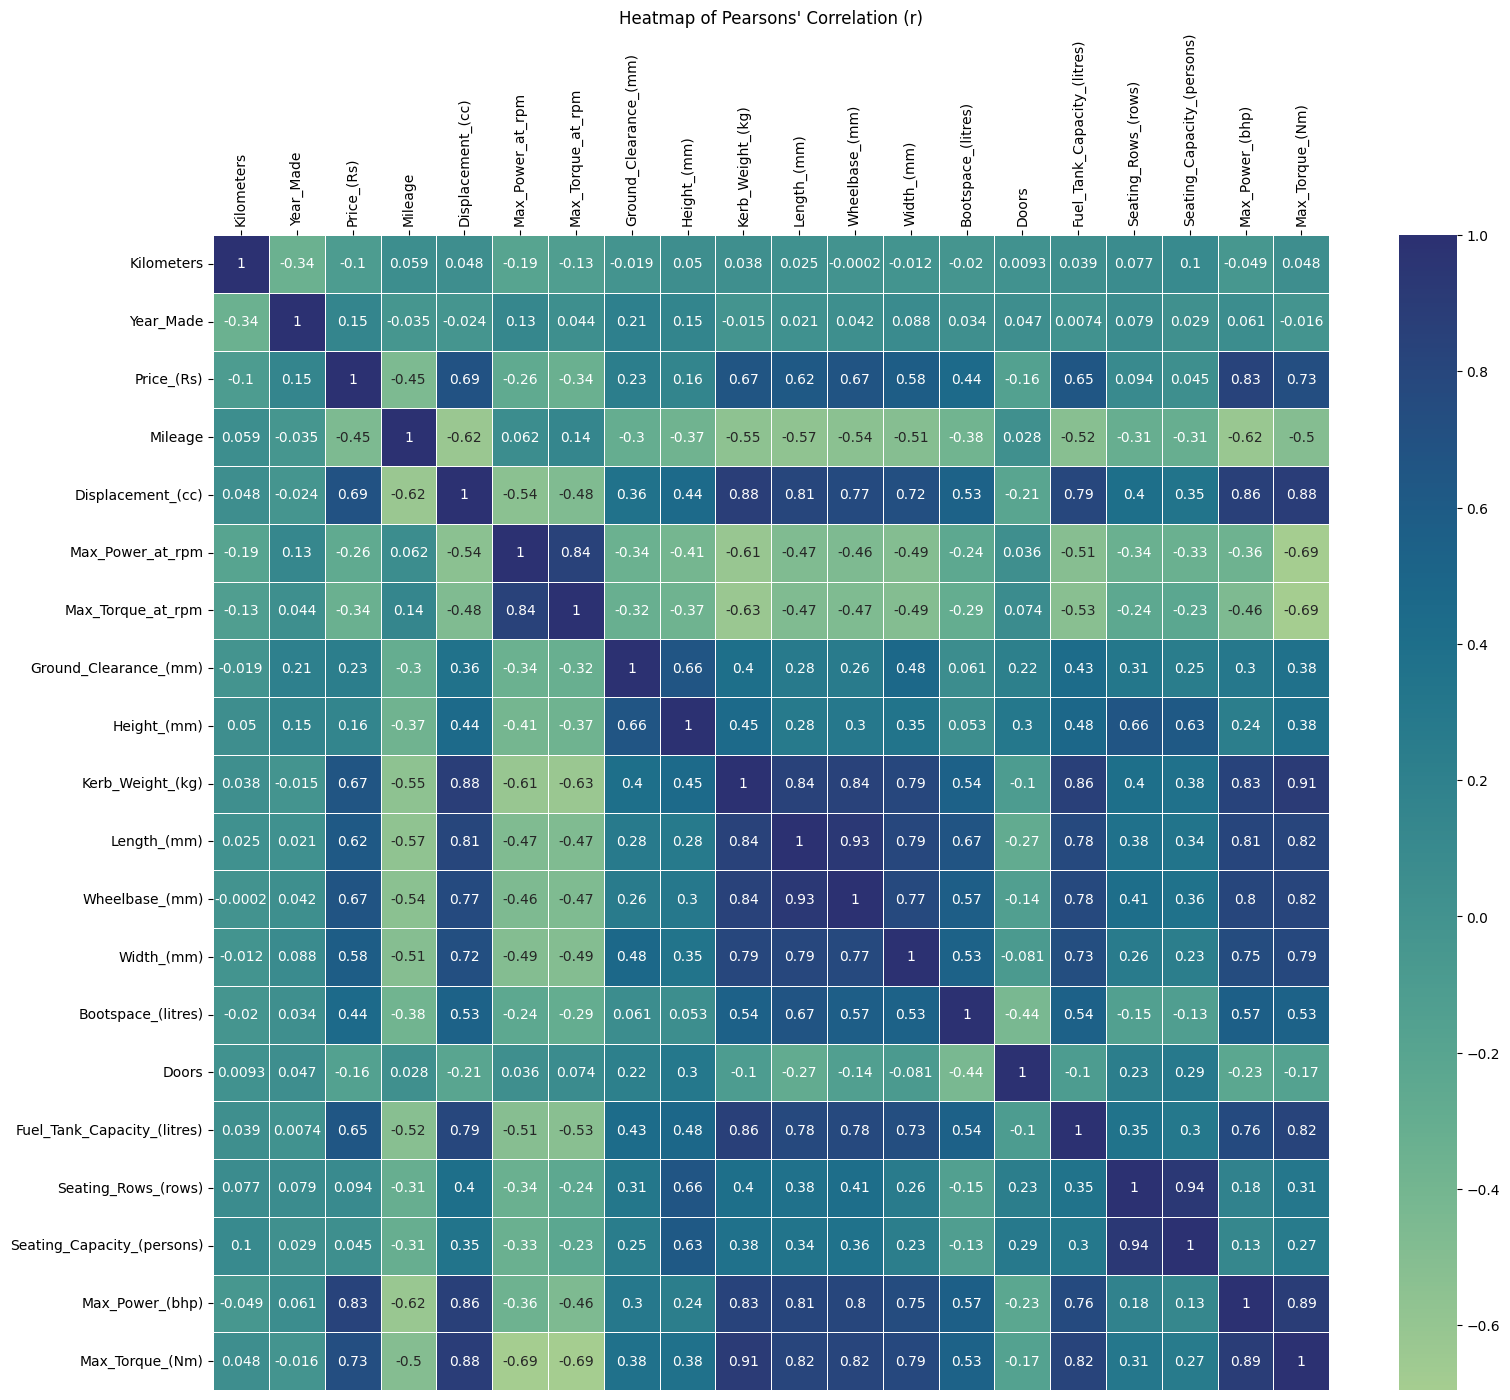

In [11]:
# using heatmap to visualize the strength of correlation coefficient
# looking for a strong positive and/or a strong negetive correlation


fig = plt.figure(figsize = (18,15))

ax = sns.heatmap(dataset_correlation.corr(),cmap="crest",annot=True,linewidth = 0.5)

plt.title("Heatmap of Pearsons' Correlation (r)")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

* Strong negative correlation was expected between **kilometers and price**, but it is a weak negative correlation.
* There is a strong correlation between **Max Power** and **Power**
* Moderate Correlation can be seen between **Price** and **Displacement**, **Kerb Weight**, **Fuel Tank Capacity**, and **Torque** 

* Checking if any ratios or cacluated values could contribute to a strong positive or negative correlation
* The following standard ratios can be checked:
    * Displacement-to-Power Ratio (cc/bhp)
    * Displacement-to-Torque Ratio (cc/Nm)
    * Power-to-Weight Ratio (bhp/kg)
    * Torque-to-Weight Ratio (Nm/kg)
* Would also be useful to check the price with respect to Days elapsed from manufacturing
    * **Days Elapsed=Current Date−Manufacturing Date**


In [16]:
#Displacement-to-Torque Ratio (cc/Nm)
carwale_dataset['Displacement_to_Torque'] = carwale_dataset['Displacement_(cc)']/carwale_dataset['Max_Torque_(Nm)']

In [17]:
#Displacement-to-Power Ratio (cc/bhp)
carwale_dataset['Displacement_to_Power'] = carwale_dataset['Displacement_(cc)']/carwale_dataset['Max_Power_(bhp)']

In [18]:
# Power-to-Weight Ratio (bhp/kg)
carwale_dataset['Power_to_Weight'] = carwale_dataset['Max_Power_(bhp)']/carwale_dataset['Kerb_Weight_(kg)']

In [19]:
# Torque-to-Weight Ratio (Nm/kg)
carwale_dataset['Torque_to_Weight'] = carwale_dataset['Max_Torque_(Nm)']/carwale_dataset['Kerb_Weight_(kg)']

* Adding Days Elapsed from Manufacturing

In [20]:
carwale_dataset['Month_Made'].unique()

array(['Apr', 'Aug', 'May', 'Jan', 'Jul', 'Dec', 'Feb', 'Oct', 'Nov',
       'Sep', 'Jun', 'Mar'], dtype=object)

In [21]:
# creating a month name and month number dataframe 

month_df = pd.DataFrame({"Month_Made":['Apr', 'Aug', 'May', 'Sep', 'Mar', 'Jan', 'Dec', 'Jul', 'Feb','Oct', 'Nov', 'Jun'],
             "Month_Number":[4,8,5,9,3,1,12,7,2,10,11,6]}
             )

In [22]:
month_df

,Month_Made,Month_Number
0,Apr,4
1,Aug,8
2,May,5
3,Sep,9
4,Mar,3
5,Jan,1
6,Dec,12
7,Jul,7
8,Feb,2
9,Oct,10


In [23]:
# joining the month number dataframe with the original dataset

carwale_dataset = carwale_dataset.merge(month_df,'left','Month_Made')

In [24]:
carwale_dataset['Month_Number']

0         4
1         8
2         5
3         1
4         7
         ..
46571     6
46572    11
46573     5
46574    11
46575     7
Name: Month_Number, Length: 46576, dtype: int64

In [25]:
# creating an assumed manufacturing date, since the month and year of manufacturing is available, the date is assumed as 1

carwale_dataset['Assumed_Manufacturing_Date'] = carwale_dataset['Year_Made'].astype(str) + '/' + carwale_dataset['Month_Number'].astype(str) + '/01'
carwale_dataset['Assumed_Manufacturing_Date'] = pd.to_datetime(carwale_dataset['Assumed_Manufacturing_Date'])

In [26]:
# adding a current date which is data set extracted date to the dataframe

carwale_dataset['Current Date'] = pd.to_datetime(dt.date(2023, 10, 1))

In [27]:
# subtracting the current date with Assumed_Manufacturing_Date to get the days elapsed from manufacturing date

carwale_dataset['Days Elapsed'] = carwale_dataset['Current Date']  - carwale_dataset['Assumed_Manufacturing_Date']

In [28]:
carwale_dataset['Days Elapsed'] 

0        548 days
1       2617 days
2       1979 days
3        273 days
4        822 days
           ...   
46571    852 days
46572   1430 days
46573   1614 days
46574   1795 days
46575   1187 days
Name: Days Elapsed, Length: 46576, dtype: timedelta64[ns]

In [29]:
carwale_dataset

,profileId,Car,Kilometers,Insurance_Type,Make,Version,Year_Made,Month_Made,City,No_Of_Owners,...,Max_Power_(bhp),Max_Torque_(Nm),Displacement_to_Torque,Displacement_to_Power,Power_to_Weight,Torque_to_Weight,Month_Number,Assumed_Manufacturing_Date,Current Date,Days Elapsed
0,S2725575,Mercedes-Benz GLE 300d 4MATIC LWB,6000.0,Third Party,Mercedes-Benz,300d 4MATIC LWB,2022,Apr,A&N Islands,First,...,241.0,500.0,3.900000,8.091286,NaN,NaN,4,2022-04-01,2023-10-01,548 days
1,S2730115,Maruti Suzuki Vitara Brezza VDi (O) [2016-2018],55000.0,Comprehensive,Maruti Suzuki,VDi (O) [2016-2018],2016,Aug,A&N Islands,First,...,89.0,200.0,6.240000,14.022472,0.075745,0.170213,8,2016-08-01,2023-10-01,2617 days
2,S2673115,Maruti Suzuki Vitara Brezza VDi,58000.0,Expired,Maruti Suzuki,VDi,2018,May,A&N Islands,First,...,89.0,200.0,6.240000,14.022472,0.075745,0.170213,5,2018-05-01,2023-10-01,1979 days
3,S2688015,Maruti Suzuki Alto 800 LXi (O),15000.0,Not Available,Maruti Suzuki,LXi (O),2023,Jan,A&N Islands,4 or More,...,47.0,69.0,11.536232,16.936170,0.062087,0.091149,1,2023-01-01,2023-10-01,273 days
4,S2789647,Nissan Magnite XE [2020],10000.0,Comprehensive,Nissan,XE [2020],2021,Jul,A&N Islands,First,...,71.0,96.0,10.406250,14.070423,0.075612,0.102236,7,2021-07-01,2023-10-01,822 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46571,S2751665,Honda Amaze S MT 1.2 Petrol [2021],12000.0,Comprehensive,Honda,S MT 1.2 Petrol [2021],2021,Jun,Mumbai,First,...,89.0,110.0,10.900000,13.471910,0.096425,0.119177,6,2021-06-01,2023-10-01,852 days
46572,S2751323,Volkswagen GTI 1.8 TSI,20000.0,Comprehensive,Volkswagen,1.8 TSI,2019,Nov,Mumbai,First,...,189.0,250.0,7.192000,9.513228,0.148468,0.196386,11,2019-11-01,2023-10-01,1430 days
46573,S2761015,Ford Endeavour Titanium Plus 3.2 4x4 AT,39000.0,Comprehensive,Ford,Titanium Plus 3.2 4x4 AT,2019,May,Mumbai,Second,...,197.0,470.0,6.804255,16.233503,0.082289,0.196324,5,2019-05-01,2023-10-01,1614 days
46574,S2784911,Hyundai Creta SX 1.6 AT CRDi,57000.0,Third Party,Hyundai,SX 1.6 AT CRDi,2018,Nov,Mumbai,First,...,126.0,260.0,6.084615,12.555556,NaN,NaN,11,2018-11-01,2023-10-01,1795 days


* creating a correlation matrix with the new ratios/columns

In [30]:
carwale_dataset.describe().columns

Index(['Kilometers', 'Year_Made', 'Price_(Rs)', 'Mileage', 'Displacement_(cc)',
       'Max_Power_at_rpm', 'Max_Torque_at_rpm', 'Ground_Clearance_(mm)',
       'Height_(mm)', 'Kerb_Weight_(kg)', 'Length_(mm)', 'Wheelbase_(mm)',
       'Width_(mm)', 'Bootspace_(litres)', 'Doors',
       'Fuel_Tank_Capacity_(litres)', 'Seating_Rows_(rows)',
       'Seating_Capacity_(persons)', 'Max_Power_(bhp)', 'Max_Torque_(Nm)',
       'Displacement_to_Torque', 'Displacement_to_Power', 'Power_to_Weight',
       'Torque_to_Weight', 'Month_Number', 'Assumed_Manufacturing_Date',
       'Current Date', 'Days Elapsed'],
      dtype='object')

In [31]:
corr_columns = ['Kilometers', 'Year_Made', 'Price_(Rs)', 'Mileage_(kmpl)', 'Displacement_(cc)',
           'Max_Power_at_rpm', 'Max_Torque_at_rpm', 'Ground_Clearance_(mm)',
           'Height_(mm)', 'Kerb_Weight_(kg)', 'Length_(mm)', 'Wheelbase_(mm)',
           'Width_(mm)', 'Bootspace_(litres)', 'Doors',
           'Fuel_Tank_Capacity_(litres)', 'Seating_Rows_(rows)',
           'Seating_Capacity_(persons)', 'Max_Power_(bhp)', 'Max_Torque_(Nm)',
           'Displacement_to_Power', 'Displacement_to_Torque', 'Power_to_Weight',
           'Torque_to_Weight', 'Days Elapsed'
          ]

In [32]:
# correlation matrix of all the numeric variabls in the dataset
# is used to find which variable has a strong positve correlation with price

dataset_correlation = carwale_dataset[corr_columns]
dataset_correlation.corr()

,Kilometers,Year_Made,Price_(Rs),Mileage,Displacement_(cc),Max_Power_at_rpm,Max_Torque_at_rpm,Ground_Clearance_(mm),Height_(mm),Kerb_Weight_(kg),...,Fuel_Tank_Capacity_(litres),Seating_Rows_(rows),Seating_Capacity_(persons),Max_Power_(bhp),Max_Torque_(Nm),Displacement_to_Power,Displacement_to_Torque,Power_to_Weight,Torque_to_Weight,Days Elapsed
Kilometers,1.000000,-0.343736,-0.102831,0.058802,0.048177,-0.194925,-0.125870,-0.019430,0.050359,0.038485,...,0.038751,0.076788,0.100849,-0.049022,0.047688,0.158836,-0.080620,-0.166125,0.079724,0.343544
Year_Made,-0.343736,1.000000,0.152538,-0.035353,-0.023637,0.131817,0.043819,0.210814,0.152684,-0.014861,...,0.007393,0.078661,0.029460,0.060931,-0.016156,-0.151369,0.035823,0.087451,-0.133021,-0.995292
Price_(Rs),-0.102831,0.152538,1.000000,-0.450171,0.685673,-0.259380,-0.336485,0.229085,0.158805,0.666755,...,0.653095,0.093664,0.045244,0.832741,0.727168,-0.425412,-0.453500,0.646013,0.606007,-0.150030
Mileage,0.058802,-0.035353,-0.450171,1.000000,-0.624590,0.061998,0.140487,-0.298147,-0.371114,-0.554410,...,-0.518885,-0.312195,-0.311309,-0.616162,-0.498665,0.343138,0.276664,-0.458800,-0.271013,0.033093
Displacement_(cc),0.048177,-0.023637,0.685673,-0.624590,1.000000,-0.537991,-0.475406,0.363879,0.444371,0.875012,...,0.790418,0.397891,0.349775,0.859895,0.883699,-0.162806,-0.528947,0.586282,0.749930,0.026697
Max_Power_at_rpm,-0.194925,0.131817,-0.259380,0.061998,-0.537991,1.000000,0.843632,-0.343506,-0.405726,-0.613884,...,-0.512247,-0.336481,-0.334762,-0.363159,-0.694880,-0.068073,0.777748,0.056588,-0.704155,-0.132655
Max_Torque_at_rpm,-0.125870,0.043819,-0.336485,0.140487,-0.475406,0.843632,1.000000,-0.317857,-0.368684,-0.626511,...,-0.525873,-0.239918,-0.227876,-0.459771,-0.691875,0.171398,0.866097,-0.080387,-0.707846,-0.044245
Ground_Clearance_(mm),-0.019430,0.210814,0.229085,-0.298147,0.363879,-0.343506,-0.317857,1.000000,0.661362,0.402131,...,0.434538,0.314567,0.248033,0.296201,0.379595,-0.116035,-0.369012,-0.135808,0.082409,-0.210566
Height_(mm),0.050359,0.152684,0.158805,-0.371114,0.444371,-0.405726,-0.368684,0.661362,1.000000,0.452119,...,0.478000,0.659464,0.625491,0.237515,0.382572,0.169258,-0.265249,-0.241117,0.018795,-0.152006
Kerb_Weight_(kg),0.038485,-0.014861,0.666755,-0.554410,0.875012,-0.613884,-0.626511,0.402131,0.452119,1.000000,...,0.863462,0.402151,0.375880,0.828980,0.907621,-0.351008,-0.700958,0.369378,0.699753,0.017706


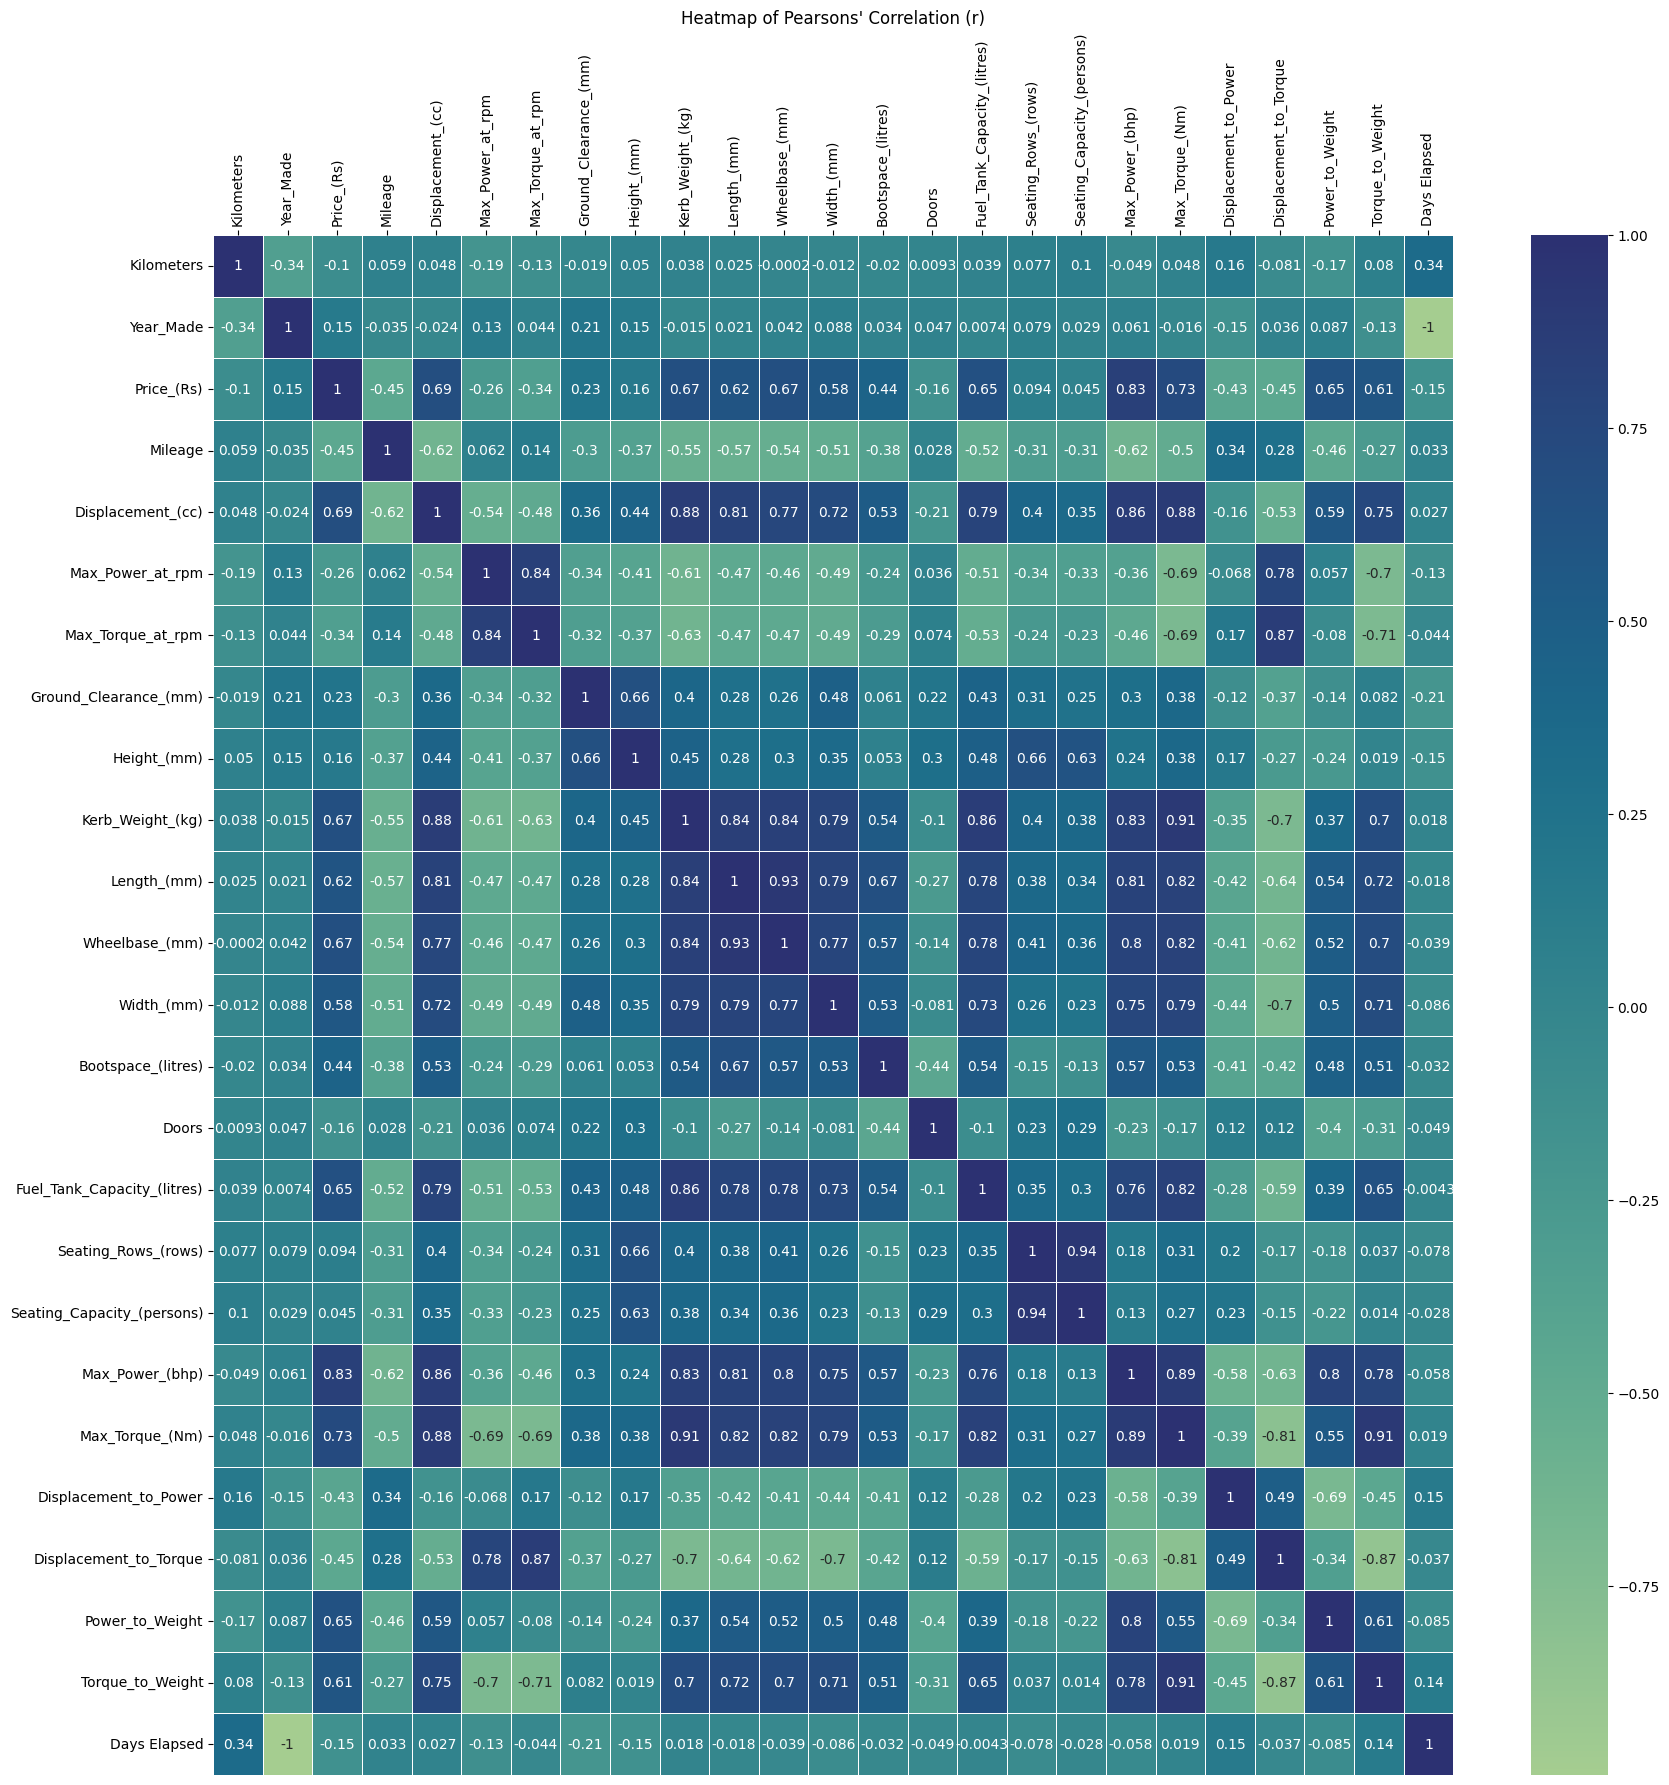

In [33]:
# using heatmap to visualize the strength of correlation coefficient
# looking for a strong positive and/or a strong negetive correlation


fig = plt.figure(figsize = (20,20))

ax = sns.heatmap(dataset_correlation.corr(),cmap="crest",annot=True,linewidth = 0.5)
plt.title("Heatmap of Pearsons' Correlation (r)")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

* It could be seen that: 
    * Displacement-to-Power Ratio (cc/bhp) has weak postive correlation with price
    * Displacement-to-Torque Ratio (cc/Nm) has weak negative correlation with price
    * Power-to-Weight Ratio (bhp/kg) has moderate postive correlation with price
    * Torque-to-Weight Ratio (Nm/kg) has moderate postive correlation with price
    * Days Elapsed=Current Date−Manufacturing Date has weak negative correlation with price
* None of the ratios are show strong positive correlation as Max Power 

* **Plotting the variables with Price using scatter plot**
* Scatter plot will reveal the relationships of variables and help in identifying a suitable variable for prediction

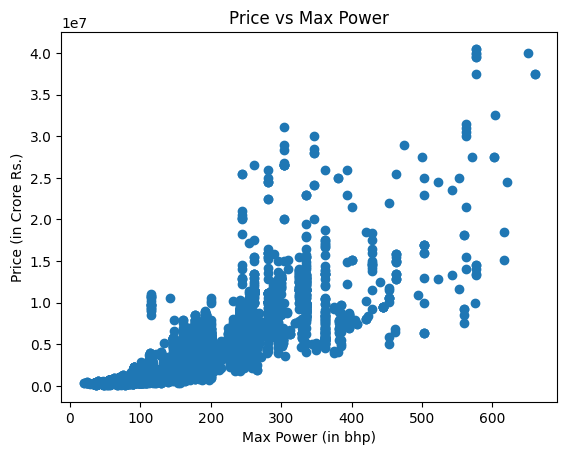

In [34]:
ax = plt.scatter(x = 'Max_Power_(bhp)', y = 'Price_(Rs)', data = carwale_dataset)

plt.xlabel('Max Power (in bhp)')
plt.ylabel('Price (in Crore Rs.)')
plt.title("Price vs Max Power")

plt.show()

* plotting scatter plot for Price vs below the variables showing moderate to high positive correlation coefficient
    * 'Displacement_(cc)'
    * 'Kerb_Weight_(kg)',
    * 'Length_(mm)',
    * 'Wheelbase_(mm)'
    * 'Width_(mm)'
    * 'Fuel_Tank_Capacity_(litres)'
    * 'Max_Power_(bhp)',
    * 'Max_Torque_(Nm)'
    * 'Power_to_Weight'
    * 'Torque_to_Weight'


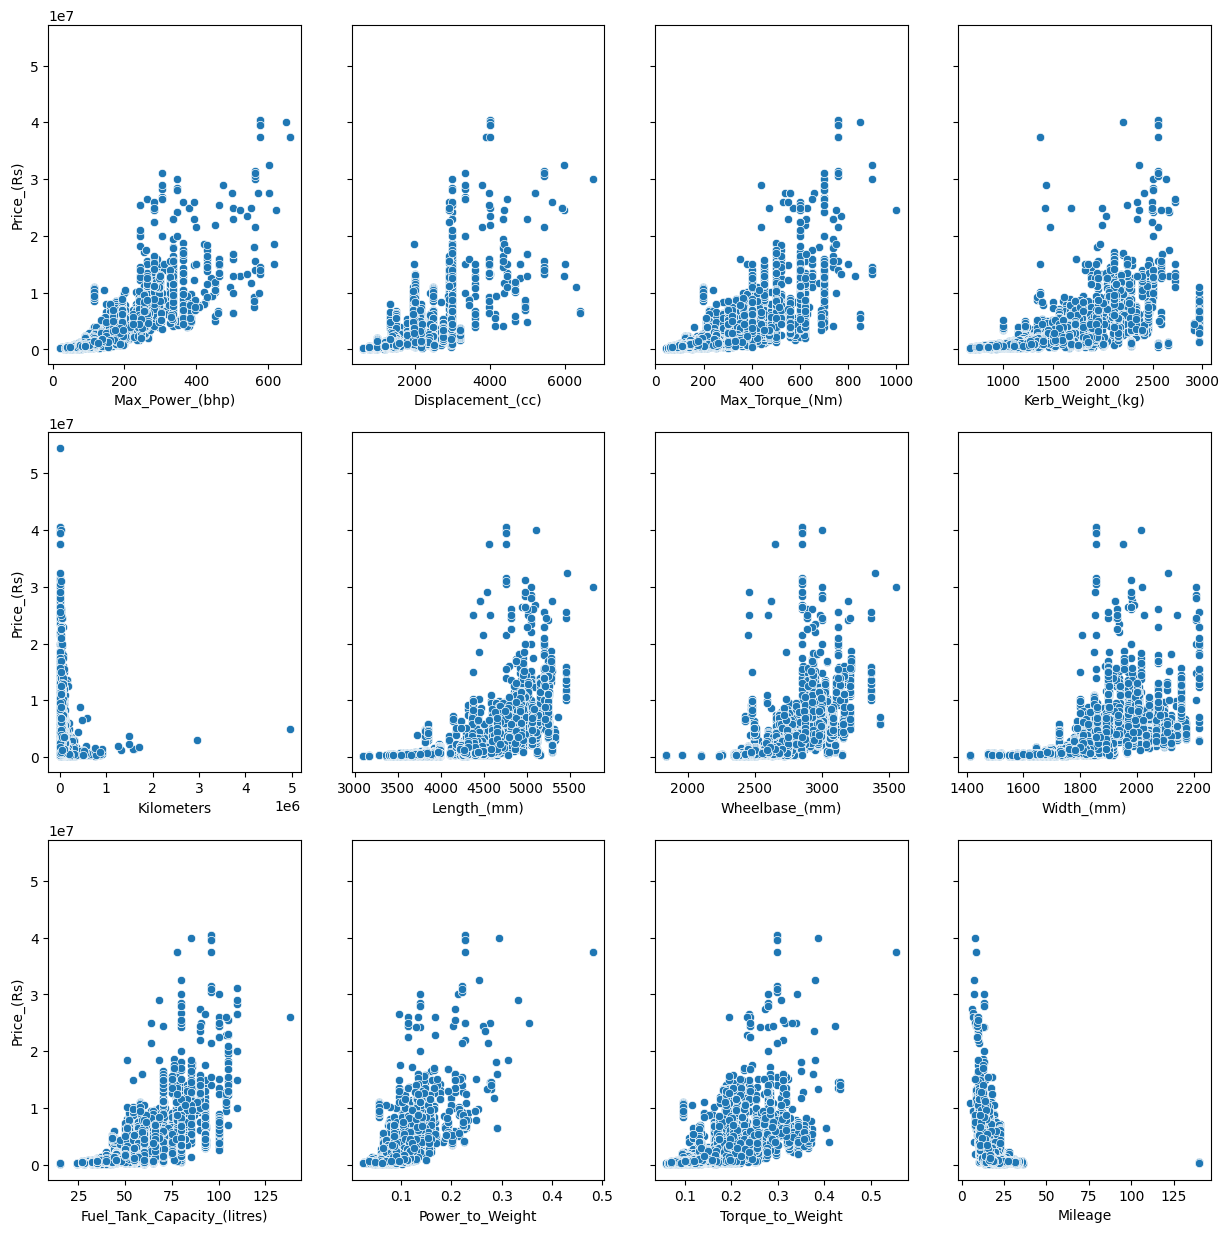

In [35]:
f, axs = plt.subplots(3,4,figsize=(15, 15,),sharey=True)

sns.scatterplot(x = 'Max_Power_(bhp)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[0,0])
sns.scatterplot(x = 'Displacement_(cc)', y = 'Price_(Rs)', data = carwale_dataset,ax=axs[0,1])
sns.scatterplot(x = 'Max_Torque_(Nm)', y = 'Price_(Rs)', data = carwale_dataset,ax=axs[0,2])
sns.scatterplot(x = 'Kerb_Weight_(kg)', y = 'Price_(Rs)', data = carwale_dataset,ax=axs[0,3])
sns.scatterplot(x = 'Kilometers', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[1,0])
sns.scatterplot(x = 'Length_(mm)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[1,1])
sns.scatterplot(x = 'Wheelbase_(mm)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[1,2])
sns.scatterplot(x = 'Width_(mm)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[1,3])
sns.scatterplot(x = 'Fuel_Tank_Capacity_(litres)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[2,0])
sns.scatterplot(x = 'Power_to_Weight', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[2,1])
sns.scatterplot(x = 'Torque_to_Weight', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[2,2])
sns.scatterplot(x = 'Mileage_(kmpl)', y = 'Price_(Rs)', data = carwale_dataset,ax = axs[2,3])

plt.show()

In [36]:
carwale_dataset[['Max_Power_(bhp)','Price_(Rs)']].dropna()['Price_(Rs)']

0        7500000
1         600000
2         650000
3         300000
4         575000
          ...   
46571     695000
46572     900000
46573    3500000
46574    1200000
46575    3500000
Name: Price_(Rs), Length: 45868, dtype: int64

* **Testing statistical significance for correlation between Price and Max Power**

In [37]:
pearson_coef, p_value = stats.pearsonr(carwale_dataset[['Max_Power_(bhp)','Price_(Rs)']].dropna()['Max_Power_(bhp)'],
                                       carwale_dataset[['Max_Power_(bhp)','Price_(Rs)']].dropna()['Price_(Rs)'])

In [38]:
pearson_coef

0.832740607571527

In [39]:
p_value

0.0

* p-value is 0.0 reveals that there is a strong evidence that the correlation is significant.
* Testing p-values of other variables.

In [40]:
var_p = ['Displacement_(cc)', 'Kerb_Weight_(kg)','Length_(mm)','Wheelbase_(mm)', 'Width_(mm)', 'Fuel_Tank_Capacity_(litres)',
'Max_Power_(bhp)','Max_Torque_(Nm)', 'Power_to_Weight', 'Torque_to_Weight','Mileage_(kmpl)','Kilometers']

In [41]:
pval = []
pcoeff = []
for i in var_p:

    pearson_coef, p_value = stats.pearsonr(carwale_dataset[[i,'Price_(Rs)']].dropna()[i],
                                       carwale_dataset[[i,'Price_(Rs)']].dropna()['Price_(Rs)'])
    pval.append(p_value)
    pcoeff.append(pearson_coef)
    

In [42]:
pval

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1071307857508007e-109]

In [43]:
pcoeff

[0.685673321045394,
 0.6667550617945618,
 0.6166717741516602,
 0.6704698226706436,
 0.5839998675892835,
 0.6530951771222175,
 0.832740607571527,
 0.7271676119650392,
 0.6460133254141309,
 0.6060067931487283,
 -0.4501705577769962,
 -0.10283091445279424]

* the p-value is zero for all the variables, showing that the correlation which is seen is significant

## SIMPLE LINEAR REGRESSION

* Prediciting values with simple linear regression.
* Using Max_Power_(bhp) for prediction as it has high positive correlation with price.

<b>Linear Function</b>
$$
Y = a + b  X
$$


* The objective here is to find a linear function that predicts the price

In [44]:
# using scikit-learn's linear regression module
from sklearn.linear_model import LinearRegression

In [45]:
# creating a linear regression object
lm = LinearRegression()

* since there are na values in the dataset, it is better to slice of the na values before getting the variables into the regression model

In [46]:
subset_data = carwale_dataset[['Max_Power_(bhp)','Price_(Rs)']].dropna().copy()

In [47]:
# sklearn's regression object expects a 2D array or a Dataframe.
X = subset_data[['Max_Power_(bhp)']]
Y = subset_data[['Price_(Rs)']]

In [48]:
# fitting a linear equation to the data

lm.fit(X,Y)

LinearRegression()

* getting the **slope(b)** and **intercept(a)**

In [49]:
b = lm.coef_[0][0]

In [50]:
a = lm.intercept_[0]

In [51]:
print ("linear_equation: :", "Y = ",a,' + ', b, 'X')
print ("linear_equation: :", "Price_(Rs) = ",a,' + ', b, 'Max_Power_(bhp)')


linear_equation: : Y =  -2061234.7030302673  +  30952.771571611585 X
linear_equation: : Price_(Rs) =  -2061234.7030302673  +  30952.771571611585 Max_Power_(bhp)


* predicting values

In [52]:
# predicting for the X variables

Y1 = lm.predict(X)

In [53]:
Y1

array([[5398383.24572812],
       [ 693561.96684316],
       [ 693561.96684316],
       ...,
       [4036461.29657721],
       [1838814.51499279],
       [3324547.55043015]])

In [54]:
subset_data['Y1'] = Y1

In [55]:
subset_data.astype('int64')

,Max_Power_(bhp),Price_(Rs),Y1
0,241,7500000,5398383
1,89,600000,693561
2,89,650000,693561
3,47,300000,-606454
4,71,575000,136412
...,...,...,...
46571,89,695000,693561
46572,189,900000,3788839
46573,197,3500000,4036461
46574,126,1200000,1838814


* It could be seen that though the correlation is positive and high between price and Max Power, the predicted values are not a close match to the actual values
* Verifying the SLR with a regression plot


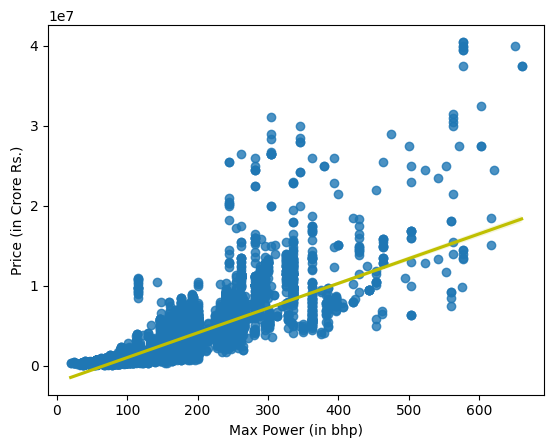

In [56]:
sns.regplot(x = subset_data[['Max_Power_(bhp)']], y = subset_data[['Price_(Rs)']],line_kws=dict(color="y"))
plt.xlabel('Max Power (in bhp)')
plt.ylabel('Price (in Crore Rs.)')
plt.show()

* evaluating the equation by **R squared** and **MSE** values

**R squared**
* R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
* The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**
* The Mean Squared Error measures the average of the squares of errors.
* That is, the difference between actual value (y) and the estimated value (ŷ)

In [57]:
# importing the scoring evaluators from sklearn
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
r_square = r2_score(Y, Y1)
mse = mean_squared_error(Y, Y1)

In [60]:
r_square

0.6934569194985944

In [61]:
mse

1266912579347.1096

* The SLR equation does not cover all the values as seen from the plot

## POLYNOMIAL REGRESSION

* Since the relationship is not linear rediciting values with Polynomial regression.


**POLYNOMIAL EQUATIONS**

<center><b>2nd Order</b></center>
$$
Y = a + b_1 X +b_2 X^2 
$$

<center><b>3rd Order</b></center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

* The objective here is to fit multiple polynomial equations and find the best fit equation for predicting values
* Using **Max_Power_(bhp)** variable for polynomial regression as it has high positive correlation with price.

In [62]:
subset_data.drop(columns = ['Y1'],inplace = True)

In [63]:
# preparing the variables
# since numpy's polyfit is used, 1D array of the format can be used.

X = subset_data['Max_Power_(bhp)']
Y = subset_data['Price_(Rs)']

In [64]:
# using 2nd order fit
# calculating the coefficients till 2nd degree - intercepts and slope

coeff = np.polyfit(X,Y,2) 

In [65]:
# create and display polynomial equation

polyeq = np.poly1d(coeff)
print(polyeq)

       2
60.65 x + 9536 x - 5.916e+05


* predicting values for the same slice used above

In [66]:
# predicting values with the 2nd order equation

Y1 = polyeq(X)

In [67]:
# adding the predicted value in the subset slice

subset_data['Y1'] = Y1

In [68]:
# verifying predictive values

subset_data.astype(int)

,Max_Power_(bhp),Price_(Rs),Y1
0,241,7500000,5229326
1,89,600000,737468
2,89,650000,737468
3,47,300000,-9486
4,71,575000,391141
...,...,...,...
46571,89,695000,737468
46572,189,900000,3377232
46573,197,3500000,3640819
46574,126,1200000,1572794


* verifying the above polynomial equation will all the values of the data

* evaluating the equation by **R squared** and **MSE** values

In [69]:
# getting the R squared score
r2_score(Y, Y1)

0.7420958556162974

We can say that ~65.419 % of the variation of price is explained by this polynomial fit.

In [70]:
# getting the MSE score
mean_squared_error(Y, Y1)

1065892612062.949

* creating and checking 2nd and 3rd order equations 
* **creating a function for polynomial regression to find the best fit equation**

In [71]:
subset_data.drop(columns = ['Y1'],inplace = True)

In [72]:
subset_data.sort_values(by = 'Max_Power_(bhp)',inplace = True)

In [73]:
# creating a function to find the best fit equation

def polynomial_regression(df,n):
    coeffs=[]
    
    X = df.iloc[:,0]
    Y = df.iloc[:,1]
    
    coeff = np.polyfit(X,Y,n)
    polyeq = np.poly1d(coeff)
    
    print(polyeq)
    print('\n')
    
    coeffs.append(polyeq)
    
    Y1 = polyeq(X)
    
    df_pred = df.copy()
    df_pred['Y1'] = Y1
    
    r_square = r2_score(Y, df_pred.iloc[:,-1])
    mse = mean_squared_error(Y, df_pred.iloc[:,-1])
    print ("R-squred: ", r_square)
    print("MSE: ",mse)

    ax = plt.scatter(x = X, y = Y)
    plt.plot(X,df_pred.iloc[:,-1],c='Red')
    
    plt.xlabel('Max Power (in bhp)')
    plt.ylabel('Price (in Crore Rs.)')
    plt.title("Price vs Max Power")

    plt.show()
    
    return df_pred.astype(int),coeffs,r_square, mse

       2
60.65 x + 9536 x - 5.916e+05


R-squred:  0.7420958556162974
MSE:  1065892612062.9489


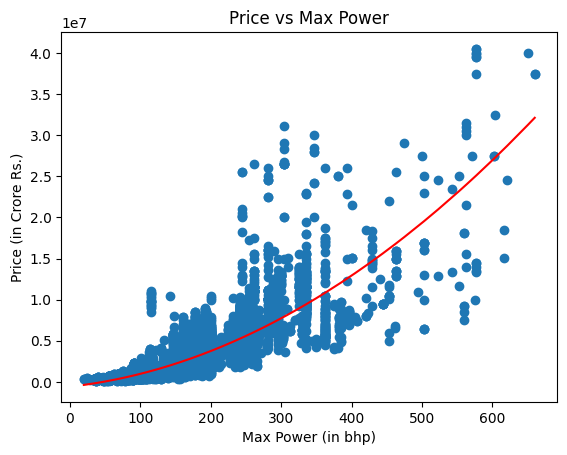

In [74]:
equation_1= polynomial_regression(subset_data,2)

         3         2
-0.1507 x + 172.2 x - 1.196e+04 x + 5.085e+05


R-squred:  0.7499431855340387
MSE:  1033460364788.5637


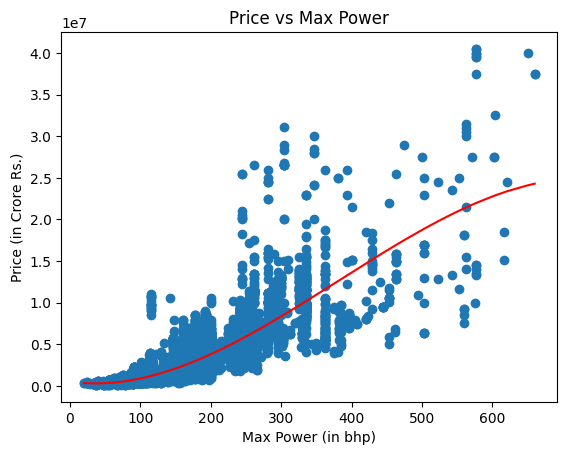

In [75]:
equation_2= polynomial_regression(subset_data,3)

          4         3       2
0.001032 x - 1.269 x + 555 x - 6.058e+04 x + 2.446e+06


R-squred:  0.758534271061291
MSE:  997954248301.0544


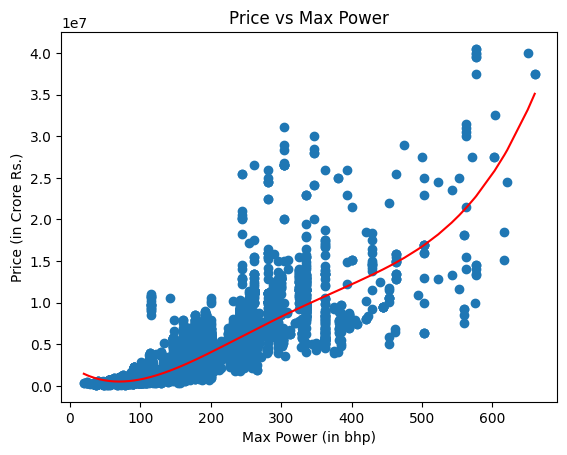

In [76]:
equation_3= polynomial_regression(subset_data,4)

           5            4         3         2
3.885e-06 x - 0.004503 x + 1.517 x - 52.14 x - 3837 x + 6.225e+05


R-squred:  0.7620116343198374
MSE:  983582645953.985


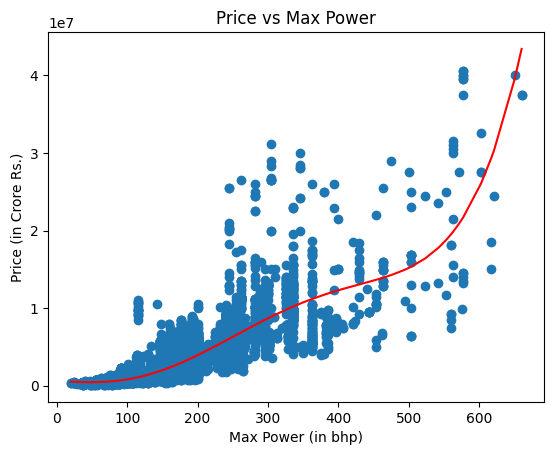

In [77]:
equation_4= polynomial_regression(subset_data,5)

           6             5           4        3        2
-2.17e-08 x + 4.298e-05 x - 0.03109 x + 10.1 x - 1417 x + 9.659e+04 x - 2.052e+06


R-squred:  0.7649771209970148
MSE:  971326579468.7883


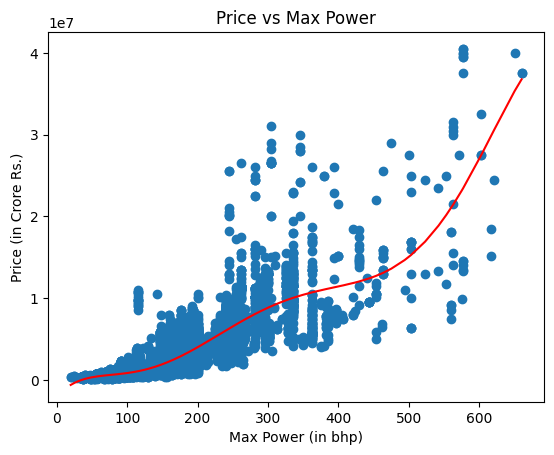

In [78]:
equation_5= polynomial_regression(subset_data,6)

           12             11             10             9             8
8.294e-22 x  - 3.276e-18 x  + 5.693e-15 x  - 5.729e-12 x + 3.696e-09 x
              7             6           5         4        3
 - 1.601e-06 x + 0.0004739 x - 0.09596 x + 13.09 x - 1164 x
             2
 + 6.36e+04 x - 1.9e+06 x + 2.36e+07


R-squred:  0.7676313720300784
MSE:  960356819469.5314


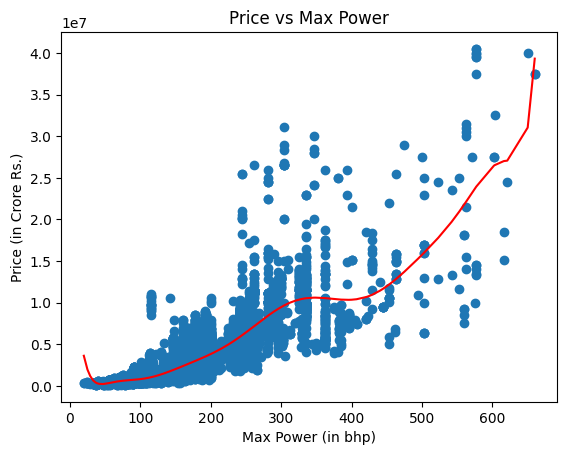

In [79]:
equation_6 = polynomial_regression(subset_data,12)

           10             9             8             7             6
3.395e-17 x  - 1.024e-13 x + 1.321e-10 x - 9.557e-08 x + 4.283e-05 x
            5         4         3             2
 - 0.01236 x + 2.308 x - 271.7 x + 1.918e+04 x - 7.203e+05 x + 1.126e+07


R-squred:  0.8011742768009803
MSE:  1380020113421.8464


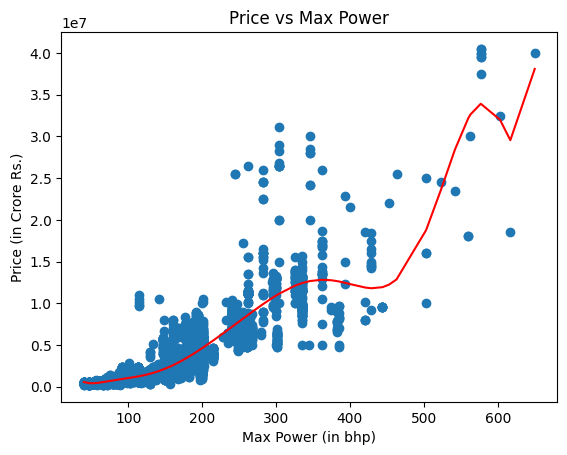

In [77]:
equation_7 = polynomial_regression(subset_data,10)

* It can be seen that R-squared value increases and MSE score decreases when the order of the polynomial increases.
* But the fitting of the equation with the data starts overfitting.
* Checking if Multiple Linear Regression predicts the data well.

## MULTIPLE LINEAR REGRESSION

* With Multiple regression, 2 or more than 2 variables are used for prediction.
* With 2 variables - best equation of regression is evaluated - which is called plane of regression - which can be visualised using 3D plot
* With more than 2 variable the best fit equation is evaluated - but cannot be visualized.
* Since the regression cannot be visualized - distribution of the actual and predicted values are compared to verify the predicted values

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + .. + b_n X_n
$$



$ X_1, ..., X_n $ - Independent Variables

$ a $             - Intercept

$ b_1, ..., b_n $ - slope of Independent Variables

From the previous section we know that other good predictors of price could be:

* 'Displacement_(cc)'
* 'Fuel_Tank_Capacity_(litres)'
* 'Max_Power_(bhp)',
* 'Max_Torque_(Nm)'
* 'Kerb_Weight_(kg)'

In [80]:
#slicing of the data required for multiple regression
carwale_mulreg_data = carwale_dataset[['Displacement_(cc)','Kerb_Weight_(kg)','Fuel_Tank_Capacity_(litres)','Wheelbase_(mm)','Max_Power_(bhp)','Max_Torque_(Nm)','Price_(Rs)']].copy()

In [81]:
carwale_mulreg_data.shape

(46576, 7)

### PLANE OF REGRESSION (BIVARIATE - 2 variables)

* creating a function for multiple linear regression to fit an equation and get the scores

In [82]:
def multiple_regression(df):
    lm = LinearRegression()

    X = df.iloc[:,:-1]
    #X = df.iloc[:,0:2]
    Y = df.iloc[:,-1]

    lm.fit(X,Y)

    Y1 = lm.predict(X)

    df['Y1'] = Y1
    
    r_square = r2_score(df.iloc[:,-2], df.iloc[:,-1])
    mse = mean_squared_error(df.iloc[:,-2], df.iloc[:,-1])

    ax1 = sns.kdeplot(df.iloc[:,-2],color="r", label="Acutal")
    sns.kdeplot(df['Y1'],color="b",ax=ax1, label="Predicted")
    plt.legend(loc="upper right")
    plt.show()
    plt.close()
    
    print ("R-squred: ", r_square)
    print("MSE: ",mse)
    
    return df.astype(int),r_square, mse

**TORQUE, POWER and PRICE**

(45868, 3)


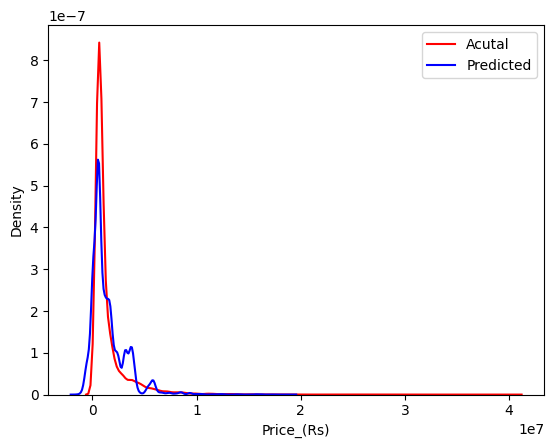

R-squred:  0.6944017589357357
MSE:  1263007650335.4368


In [83]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Max_Torque_(Nm)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_1 = multiple_regression(df_1)

**DISPLACEMENT, POWER and PRICE**

(45853, 3)


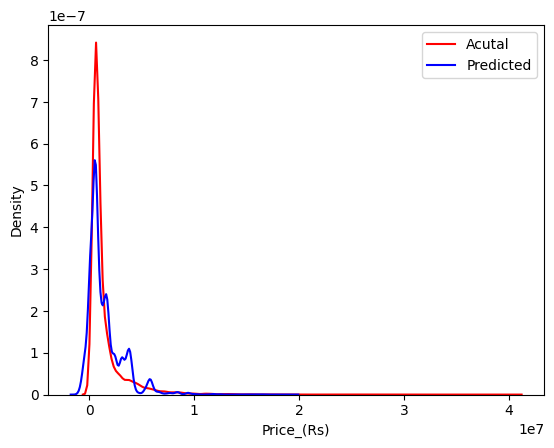

R-squred:  0.6971716445008511
MSE:  1251853315098.9111


In [84]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Displacement_(cc)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_2 = multiple_regression(df_1)

**KERB WEIGHT, POWER and PRICE**

(28913, 3)


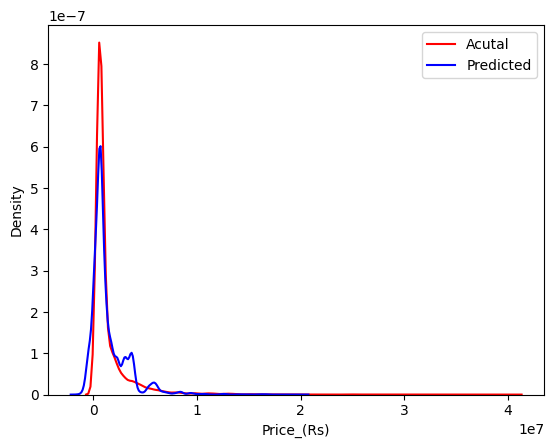

R-squred:  0.7152216859318274
MSE:  1268385642219.3035


In [85]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Kerb_Weight_(kg)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_3 = multiple_regression(df_1)

**FUEL TANK CAPACITY, POWER and PRICE**

(45319, 3)


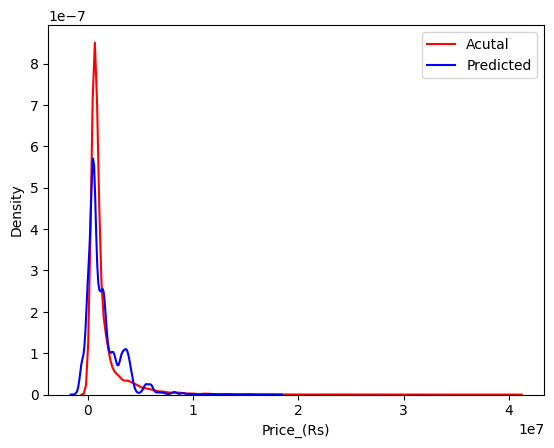

R-squred:  0.6901689243559636
MSE:  1248653050256.7441


In [86]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Fuel_Tank_Capacity_(litres)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_4 = multiple_regression(df_1)

**DISPLACEMENT, TORQUE and PRICE**

(45853, 3)


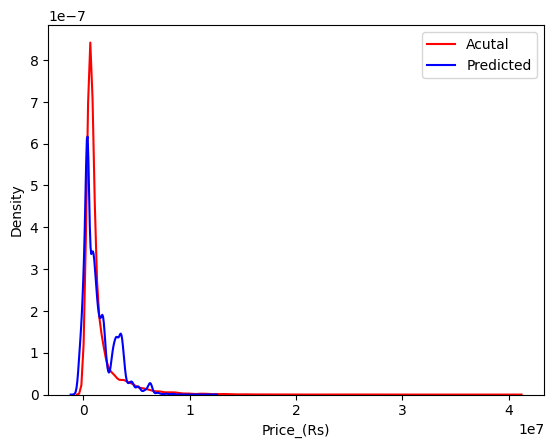

R-squred:  0.5372246677955181
MSE:  1913053461626.082


In [87]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Displacement_(cc)','Max_Torque_(Nm)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_5 = multiple_regression(df_1)

**DISPLACEMENT, FUEL TANK CAPACITY and PRICE**

(45314, 3)


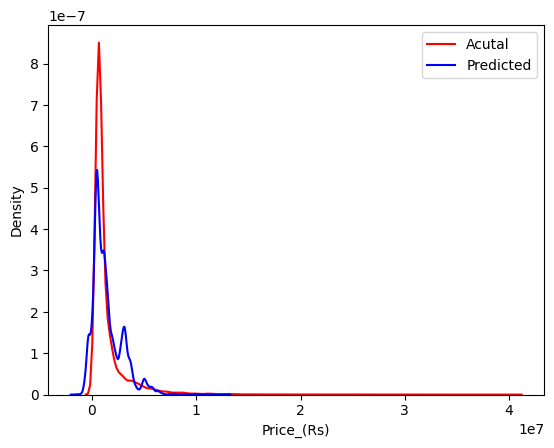

R-squred:  0.5001951545866593
MSE:  2014432357604.7456


In [88]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Displacement_(cc)','Fuel_Tank_Capacity_(litres)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_6 = multiple_regression(df_1)

**WHEELBASE, POWER and PRICE**

(45868, 3)


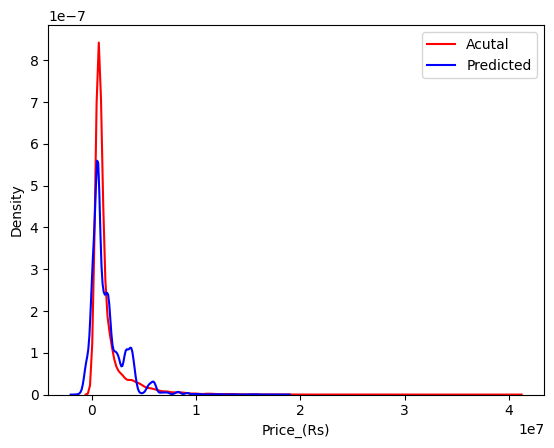

R-squred:  0.6934570786131907
MSE:  1266911921742.0408


In [89]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Wheelbase_(mm)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_7 = multiple_regression(df_1)

**WHEELBASE, DISPLACEMENT and PRICE**

(45854, 3)


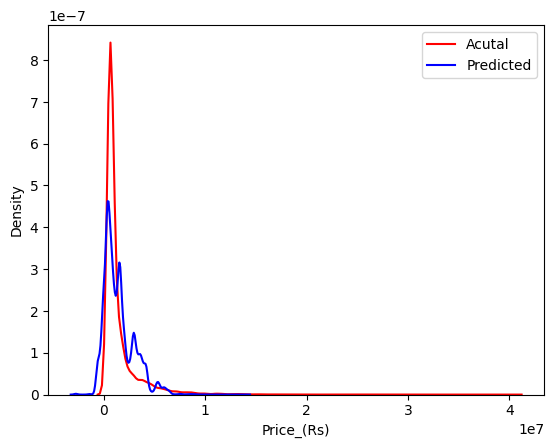

R-squred:  0.5204790974157423
MSE:  1982248293170.3877


In [90]:
# getting the bivariate dataset

df_1 = carwale_mulreg_data[['Wheelbase_(mm)','Displacement_(cc)','Price_(Rs)']].dropna().copy()
print(df_1.shape)

# evaluating the plane of regression

por_8 = multiple_regression(df_1)

* verifying with the scores and distribution and the scores.
* it can be seen that **DISPLACEMENT, POWER and TORQUE** are good predictors
* most of the records for **KERB WEIGHT** is null, hence cannot be considered.

* **Note:** suspecting that if data is categorized maybe, the R-squared score could be high

### MULTIPLE LINEAR REGRESSION (MULTIVARIATE)

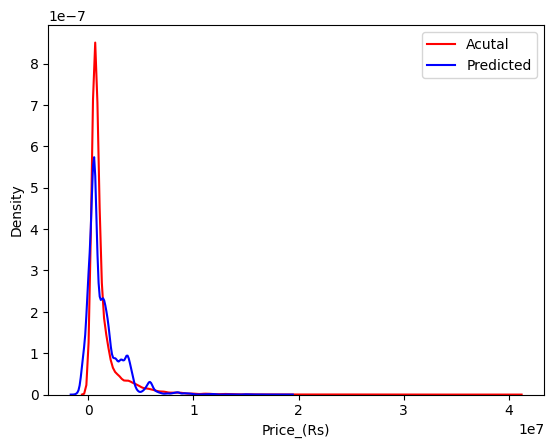

R-squred:  0.6967622288101798
MSE:  1222199326365.2717


In [91]:
# evaluating multiple regression using all the variables except KERB WEIGHT
df_1 = carwale_mulreg_data[['Displacement_(cc)', 'Fuel_Tank_Capacity_(litres)','Wheelbase_(mm)', 'Max_Power_(bhp)', 'Max_Torque_(Nm)', 'Price_(Rs)']].dropna().copy()
mulreg_1 = multiple_regression(df_1)

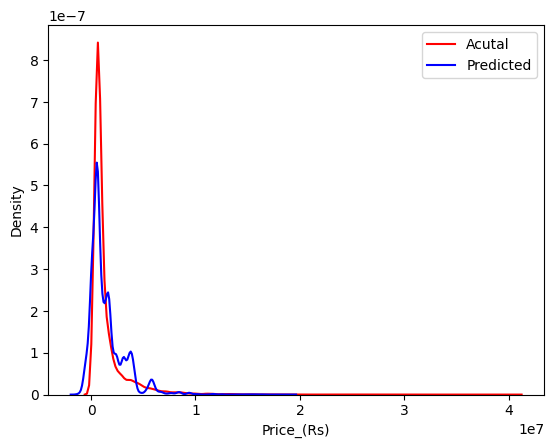

R-squred:  0.697426211545676
MSE:  1250800967809.7886


In [92]:
# evaluating multiple regression using all the variables except KERB WEIGHT
df_1 = carwale_mulreg_data[['Displacement_(cc)','Wheelbase_(mm)', 'Max_Power_(bhp)', 'Max_Torque_(Nm)', 'Price_(Rs)']].dropna().copy()
mulreg_2 = multiple_regression(df_1)

* The R-squared here also is around 60% as seen for MLR for bivariates.
* Checking on Ridge Regression

## RIDGE REGRESSION

In [93]:
# using this dataframe for ridge regression 
# these variables are good predictors and can be used for prediction

df_rr = carwale_mulreg_data[['Displacement_(cc)','Max_Power_(bhp)', 'Max_Torque_(Nm)', 'Price_(Rs)']].dropna().copy()


In [94]:
# importing RIDGE REGRESSION object
from sklearn.linear_model import Ridge

In [95]:
# seting the alpha parameter
RigeModel=Ridge(alpha=50) 

# alpha paramater is the hyperparameter, which can be adjusted accordingly for fitting the model to the data and modifying coefficients

In [96]:
# setting the variables
X = df_rr.iloc[:,:-1] # OTHER VARIABLES
Y = df_rr.iloc[:,-1] # PRICE

In [97]:
# fitting the equation to the data

RigeModel.fit(X,Y)

Ridge(alpha=50)

In [98]:
Y1 = RigeModel.predict(X)

In [99]:
RigeModel.score(X,Y)

0.6971720179202321

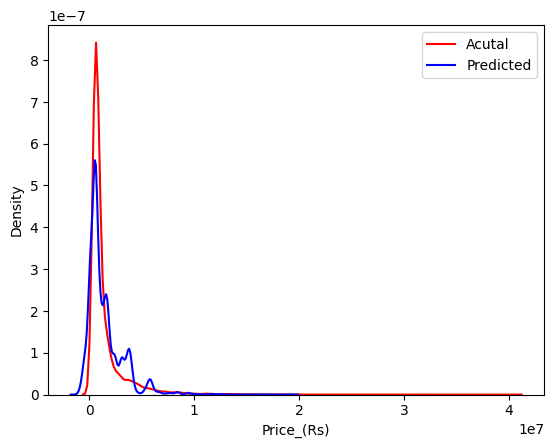

In [100]:
ax1 = sns.kdeplot(Y,color="r", label="Acutal")
sns.kdeplot(Y1,color="b",ax=ax1, label="Predicted")
plt.legend(loc="upper right")
plt.show()

* trying to convert the given variables to polynomial features and trying ridge regression

In [101]:
# importing polynomical features for ridge regression
from sklearn.preprocessing import PolynomialFeatures


In [102]:
pf = PolynomialFeatures(degree = 2) # assigning required order to which tthe features are to be created

In [103]:
# transforming the variables to polynomial features of degree 2

X_ply = pf.fit_transform(X)

In [104]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn.linear_model._ridge", message="Ill-conditioned matrix*")

In [105]:
# creating an equation to fit the data
RigeModel_ply = Ridge(alpha=1)
RigeModel_ply.fit(X_ply,Y)

Ridge(alpha=1)

In [106]:
Y_ply = RigeModel_ply.predict(X_ply)

In [107]:
RigeModel_ply.score(X_ply,Y)

0.7692460884400947

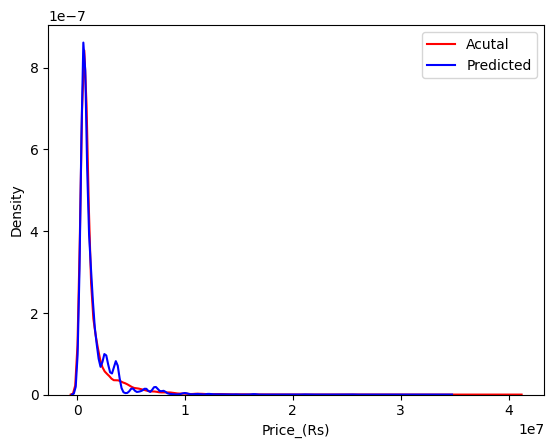

In [108]:
ax1 = sns.kdeplot(Y,color="r", label="Acutal")
sns.kdeplot(Y_ply,color="b",ax=ax1, label="Predicted")
plt.legend(loc="upper right")
plt.show()

* The fit now seems to be good and is much better than the other Regression Models

* **creating a function to get the best alpha value and the Rigression Model for prediction**

In [109]:
def ridge_regression(df,alphalow,alphahigh,alphastep,n):
    pf = PolynomialFeatures(degree=n) # setting the degree with n
    X = pf.fit_transform(df.iloc[:,:-1])
    Y = df.iloc[:,-1]
    alphas = []
    scores = []
    for i in np.arange(alphalow,alphahigh,alphastep):
        
        RigeModel = Ridge(alpha=i)
        RigeModel.fit(X,Y)
        alphas.append(i)
        scores.append(RigeModel.score(X,Y))
    alpha_df = pd.DataFrame({"alpha":alphas,"score":scores}).sort_values(by = 'alpha',ascending=False)
    print(alpha_df["score"].max())
    plt.plot(alpha_df['alpha'],alpha_df['score'])
    #plt.plot(alpha_df['alpha'][0:600],alpha_df['score'][0:600])
    plt.xlabel('alpha')
    plt.ylabel('R-Squared')
    plt.show()
    
    return alpha_df
        

0.7692460884400948


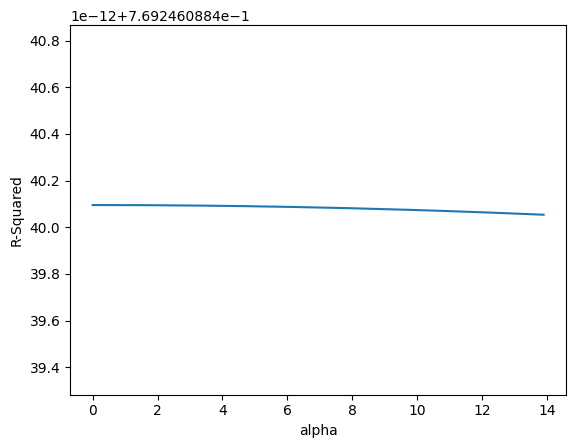

In [110]:
# evaluating the function for alpha between 0 and 14, with increaments of 0.1 and polynomial degree 2
rr_1 = ridge_regression(df_rr,0,14,0.1,2)

0.7795204578428014


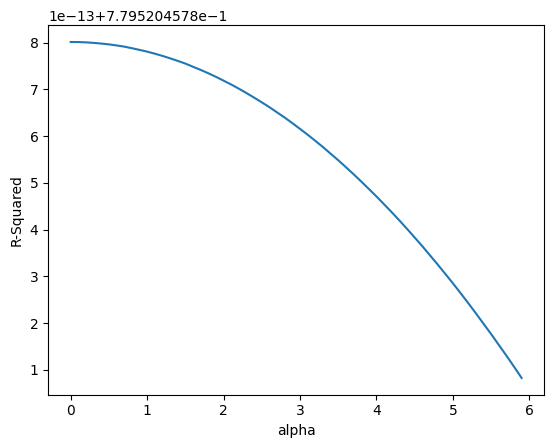

In [111]:
# evaluating the function for alpha between 0 and 6, with increaments of 0.1 and polynomial degree 3
rr_2 = ridge_regression(df_rr,0,6,0.1,3)

0.792585652746352


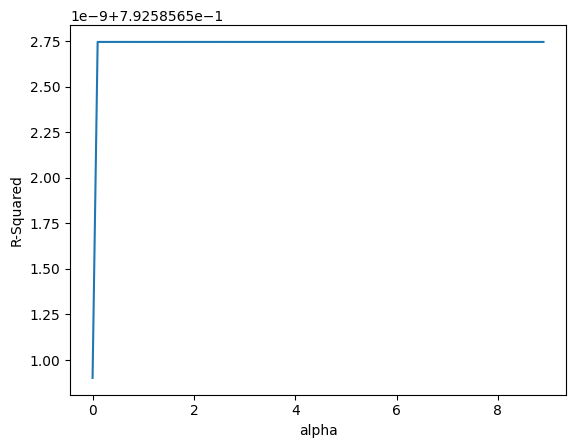

In [112]:
# evaluating the function for alpha between 0 and 9, with increaments of 0.1 and polynomial degree 4
rr_3 = ridge_regression(df_rr,0,9,0.1,4)

0.8080136213318126


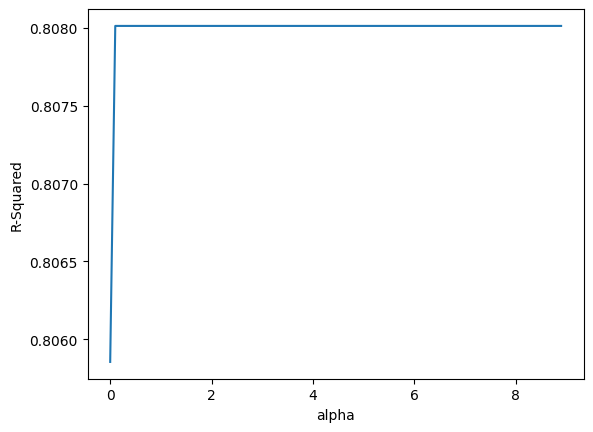

In [113]:
# evaluating the function for alpha between 0 and 9, with increaments of 0.1 and polynomial degree 4
rr_4 = ridge_regression(df_rr,0,9,0.1,5)

0.5756862592251057


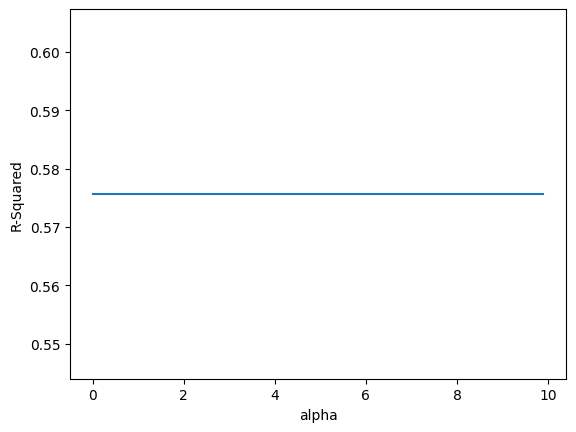

In [114]:
# evaluating the function for alpha between 0 and 9, with increaments of 0.1 and polynomial degree 4
rr_5 = ridge_regression(df_rr,0,10,0.1,7)

* The rigde function is evaluated for various values of polynomial orders and alpha values
* the max R-squared value that could be got is 0.8, when the **polynomial order** of **5** and **alpha** of **0.1**

In [116]:
def ridge_regression_eval(df,alpha,n):
    pf = PolynomialFeatures(degree=n) # setting the degree with n
    X = pf.fit_transform(df.iloc[:,:-1])
    Y = df.iloc[:,-1]

    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(X,Y)
    Y1 = RigeModel.predict(X)
    
    df_re = df.copy()
    df_re['Y1'] = Y1

    scr = RigeModel.score(X,Y)
    mse = mean_squared_error(Y,Y1)
    
    print(scr,mse)
    
    ax1 = sns.kdeplot(Y,color="r", label="Acutal")
    sns.kdeplot(Y1,color="b",ax=ax1, label="Predicted")
    plt.legend(loc="upper right")
    
    plt.show()

    return df_re,mse,scr

0.8080136213318126 793646896749.3394


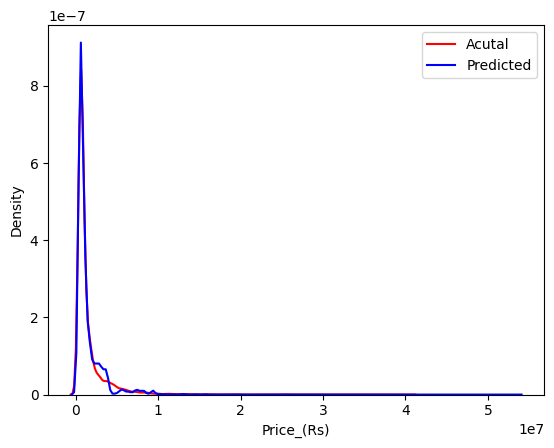

In [117]:
# polynomial transformed features
rr = ridge_regression_eval(df_rr,0.1,5)

* finding the best alpha parameter

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [120]:
RR=Ridge()
RR

Ridge()

In [121]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [122]:
Grid1.fit(df_rr.iloc[:,:-1], df_rr.iloc[:,-1])

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [123]:
BestRR=Grid1.best_estimator_

In [124]:
BestRR

Ridge(alpha=100000)

In [125]:
BestRR.score(df_rr.iloc[:,:-1], df_rr.iloc[:,-1])

0.6971695031725178

0.8079899235716136 793744860229.7296


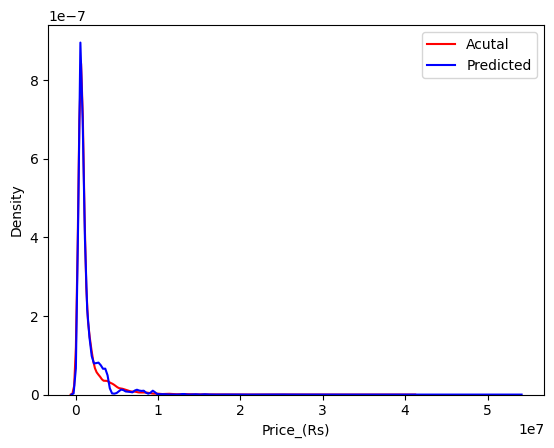

(       Displacement_(cc)  Max_Power_(bhp)  Max_Torque_(Nm)  Price_(Rs)  \
 0                 1950.0            241.0            500.0     7500000   
 1                 1248.0             89.0            200.0      600000   
 2                 1248.0             89.0            200.0      650000   
 3                  796.0             47.0             69.0      300000   
 4                  999.0             71.0             96.0      575000   
 ...                  ...              ...              ...         ...   
 46571             1199.0             89.0            110.0      695000   
 46572             1798.0            189.0            250.0      900000   
 46573             3198.0            197.0            470.0     3500000   
 46574             1582.0            126.0            260.0     1200000   
 46575             2755.0            174.0            450.0     3500000   
 
                  Y1  
 0      8.246837e+06  
 1      6.870214e+05  
 2      6.870214e+05  
 3    

In [126]:
# using the alpha score from best evaluator:

ridge_regression_eval(df_rr,100000,5)

### Conclusion of checking the models

* Taking a look at the scores of all the models


* **Simple Linear Regression**
    * Predictor Variable: <i><b>'Max_Power_(bhp)'</b></i>
    * R-squared: 60.23%
    * MSE: 1.193 x 10^12
* <b>Polynomial Regression</b>
    * Predictor Variable: <i><b>'Max_Power_(bhp)'</b></i>
    * Polynomial degree: 5
    * R-squared:  67.05%
    * MSE:  9.88 x 10^11
* **Multiple Linear Regression (Bivariate)**
    * Predictor Variable: <i><b>'Displacement_(cc)','Max_Power_(bhp)'</b></i>
    * R-squared:  61.32%
    * MSE:  1.16 x 10^12
* **Multiple Linear Regression (Multivariate)**
    * Predictor Variable: <i><b>'Displacement_(cc)','Wheelbase_(mm)', 'Max_Power_(bhp)', 'Max_Torque_(Nm)'</b></i>
    * R-squared:  61.40%
    * MSE:  1.15 x 10^12
* **Ridge Regression (Multivariate)**
    * Predictor Variable: <i><b>'Displacement_(cc)','Max_Power_(bhp)', 'Max_Torque_(Nm)'</b></i>
    * Polynomial degree: 4
    * R-squared: 78.3
    * MSE:  6.49 x 10^11


* Looking at the above scores, the models with least MSE and high R-squared values are Polynomial Regression model and Ridge Regression Model.414918.7654



## EVALUATION

* To evaluate the models, training and test has be to performed.
* With the existing dataset, training and testing data can be split and the models can be evaluated for accuracy

In [127]:
# using sklearn's train, test splits
from sklearn.model_selection import train_test_split

### Ridge Regression Model Evaluation

In [128]:
# using the same dataset from above
df_rr.head()

,Displacement_(cc),Max_Power_(bhp),Max_Torque_(Nm),Price_(Rs)
0,1950.0,241.0,500.0,7500000
1,1248.0,89.0,200.0,600000
2,1248.0,89.0,200.0,650000
3,796.0,47.0,69.0,300000
4,999.0,71.0,96.0,575000


In [129]:
X = df_rr.iloc[:,:-1]
Y = df_rr.iloc[:,-1]

In [130]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.40, random_state=0)

In [131]:
print("training records: ", x_train_1.shape[0])
print("testing records: ", x_test_1.shape[0])

training records:  27511
testing records:  18342


In [132]:
# using the ridge regression function and modifying the function for evaluation

def ridge_regression_eval(df,alpha,degree,test_size):
    
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]

    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=test_size, random_state=0)
    
    pf = PolynomialFeatures(degree=degree) # setting the degree with n
    x_train_1 = pf.fit_transform(x_train_1)
    x_test_1 = pf.fit_transform(x_test_1)

    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_1,y_train_1)
    
    Y_train = RigeModel.predict(x_train_1)
    Y_test = RigeModel.predict(x_test_1)
    
    scr_train = RigeModel.score(x_train_1,y_train_1)
    
    scr_test = RigeModel.score(x_test_1,y_test_1)
    
    mse_test = mean_squared_error(y_test_1,Y_test)
    mse_train = mean_squared_error(y_train_1,Y_train)
    
    print('\n',"r-squared training: ", scr_train,'\n',
          "mse training: ", mse_train,'\n',
          "r-squared testing: ", scr_test,'\n',
          "mse testing: ", mse_test,'\n',
         )
    fig, (ax1,ax2) = plt.subplots(1,2)
    sns.kdeplot(y_train_1,color="r",ax=ax1, label="Acutal-train")
    sns.kdeplot(Y_train,color="b",ax=ax1, label="Predicted-train")
    
    sns.kdeplot(y_test_1,color="r",ax=ax2, label="Acutal-test")
    sns.kdeplot(Y_test,color="b",ax=ax2 , label="Predicted-test")
    
    plt.legend(loc="upper right")
    
    plt.show()

    return 


 r-squared training:  0.8145666514543337 
 mse training:  774960484784.6658 
 r-squared testing:  0.7845375896186184 
 mse testing:  867896215862.7368 



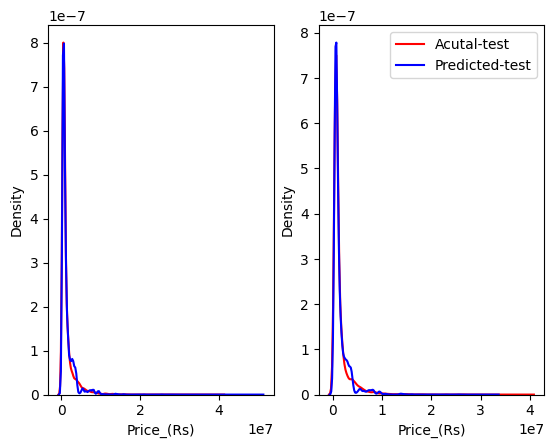

In [133]:
# checking the performance of the ridge model with training and testing datasets

ridge_regression_eval(df_rr,100000,5,0.30)

* prediction score is very low
* using **cross-validation score** for verifying scores with different sets of train and test data
* also experiment with different degrees for polynomial feature

In [134]:
# importing cross-validation module

from sklearn.model_selection import cross_val_score

In [135]:
# creating a ridge model object
RigeModel = Ridge(alpha=100000)

In [136]:
# variables from the df_rr dataset

X = df_rr.iloc[:,:-1]
Y = df_rr.iloc[:,-1]

In [137]:
# Transforming the predictor variable to polynomial features with degree 7
pf = PolynomialFeatures(degree=5)
Xp = pf.fit_transform(X)

In [138]:
# getting the R-squared scores to evaluate if the model performs well with different sets of test and train data

r_sq_cross_val = cross_val_score(RigeModel, Xp, Y, cv=8)

# cv = 8 represents the folds of dataset being created for testing and training
# i.e. 8 different test and training data

In [139]:
r_sq_cross_val

array([ 0.73587123,  0.79386056, -1.96459187,  0.78412183,  0.78780122,
        0.78662214,  0.42438505, -0.41235428])

In [140]:
r_sq_cross_val.mean()

0.2419644847407785

In [141]:
r_sq_cross_val.std()

0.9197390059983392

* from seeing the scores above this model is not consistent and may not perform well with real time data
* checking if lowering the degrees of polynomial could have any effect

In [142]:
# Transforming the predictor variable to polynomial features with degree 4
pf = PolynomialFeatures(degree=4)
Xp = pf.fit_transform(X)

In [143]:
r_sq_cross_val = cross_val_score(RigeModel, Xp, Y, cv=8)

In [144]:
r_sq_cross_val

array([0.79218776, 0.78012757, 0.77219094, 0.78184078, 0.78270355,
       0.78869652, 0.77024473, 0.73418683])

In [145]:
# mean of scores
r_sq_cross_val.mean()

0.7752723351119382

In [146]:
# standard deviation of scores
r_sq_cross_val.std()

0.016996588218100083

* lowering the degrees again

In [147]:
# Transforming the predictor variable to polynomial features with degree 4
pf = PolynomialFeatures(degree=3)
Xp = pf.fit_transform(X)

In [148]:
r_sq_cross_val = cross_val_score(RigeModel, Xp, Y, cv=8)

In [149]:
r_sq_cross_val

array([0.79482068, 0.76168097, 0.7699553 , 0.77514041, 0.79278107,
       0.7767455 , 0.75193484, 0.75496478])

In [150]:
# mean of scores
r_sq_cross_val.mean()

0.7722529457470435

In [151]:
# standard deviation of scores
r_sq_cross_val.std()

0.01494982802666866

* changing the degrees of polynomial features to 4 creates some consistent and effective scores.
* **mean** and **standard deviation** of scores suggest that the scores are consistent and this model is a good predictor.


 r-squared training:  0.7994911729236074 
 mse training:  837963716092.0881 
 r-squared testing:  0.7685371146724784 
 mse testing:  932347140890.3597 



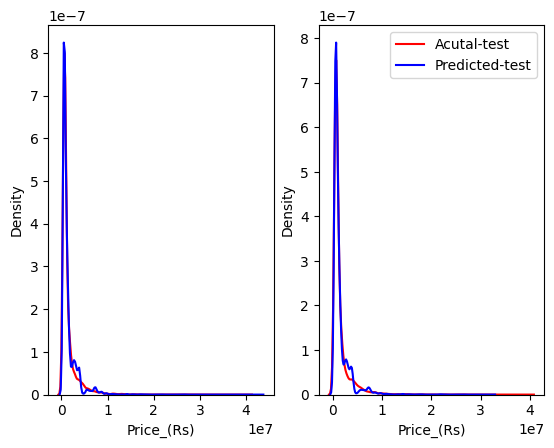

In [152]:
# evaluating the model again by changing the degrees, using test and train sets

ridge_regression_eval(df_rr,10000,4,0.30)

* the scoring seems to be good and this model can be utilized.

* checking the scores of other models with cross validation technique

### Polynomial Regression Model Evaluation

In [153]:
X = subset_data[['Max_Power_(bhp)']]
Y = subset_data[['Price_(Rs)']]

In [154]:
lm = LinearRegression()

In [155]:
pf = PolynomialFeatures(degree=5)
Xp = pf.fit_transform(X)

In [156]:
r_sq_cross_val = cross_val_score(lm, Xp, Y, cv=8)

In [157]:
(r_sq_cross_val)

array([-9.66087663e+00, -1.66740991e-01, -4.78220570e-02, -1.35157545e-01,
        9.59146982e-02, -4.75298627e-02,  5.89996526e-02, -9.79083052e+03])

* the scores are inconsistent and the model will not perform

### Multiple Regression Model Evaluation

In [158]:
df_1 = carwale_mulreg_data[['Max_Torque_(Nm)','Max_Power_(bhp)','Price_(Rs)']].dropna().copy()

In [159]:
X = df_1[['Max_Power_(bhp)','Max_Torque_(Nm)']]
Y = df_1[['Price_(Rs)']]

In [160]:
lm = LinearRegression()

In [162]:
r_sq_cross_val = cross_val_score(lm, X, Y, cv=4)

In [163]:
r_sq_cross_val

array([0.69987428, 0.69720669, 0.62042622, 0.68328192])

* scores are consistent, but are not has high as Ridge Regression

* finalizing Ridge Regression model for predicting prices

## CREATING PIPELINE FOR THE RIDGE MODEL

In [164]:
from sklearn.pipeline import Pipeline

# sklearn pipepline is used to create a pipeline for model development using sklearn's classes/objects

In [166]:
# list of tuples of the process labels and process used

model_pipline = Pipeline(
                         [ ('polynomial features', PolynomialFeatures(degree=4)),
                           ('ridge, regression', Ridge(alpha=100000)),
                          ]
                        )

In [167]:
model_pipline

Pipeline(steps=[('polynomial features', PolynomialFeatures(degree=4)),
                ('ridge, regression', Ridge(alpha=100000))])

* checking the pipline
* using the dataframe used for ridge regression processing and evaluation 

In [168]:
df_rr.head()

,Displacement_(cc),Max_Power_(bhp),Max_Torque_(Nm),Price_(Rs)
0,1950.0,241.0,500.0,7500000
1,1248.0,89.0,200.0,600000
2,1248.0,89.0,200.0,650000
3,796.0,47.0,69.0,300000
4,999.0,71.0,96.0,575000


In [169]:
# getting the variables

X = df_rr.iloc[:,:-1]
Y = df_rr.iloc[:,-1]

In [170]:
# creating a training and testing data
# testing data is 40% of the original data

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.4, random_state=0)

In [171]:
# using the pipeline for fitting
model_pipline.fit(x_train_1,y_train_1)

Pipeline(steps=[('polynomial features', PolynomialFeatures(degree=4)),
                ('ridge, regression', Ridge(alpha=100000))])

In [172]:
# checking the scores
model_pipline.score(x_test_1,y_test_1)

0.7708374359128547

In [173]:
# predicting the values
Y_predict = model_pipline.predict(x_test_1)

In [174]:
df_new = pd.DataFrame(y_test_1)

In [175]:
df_new['Y'] = Y_predict

In [176]:
# comparing predicted values with the actual test values

df_new.astype('int64')

,Price_(Rs),Y
19519,300000,477513
33884,1823000,2375462
23327,900000,681141
44500,800000,1062158
23928,2200000,2546037
...,...,...
11578,2475000,5479581
31572,2000000,3440398
16107,2057000,1080945
6355,575000,575260


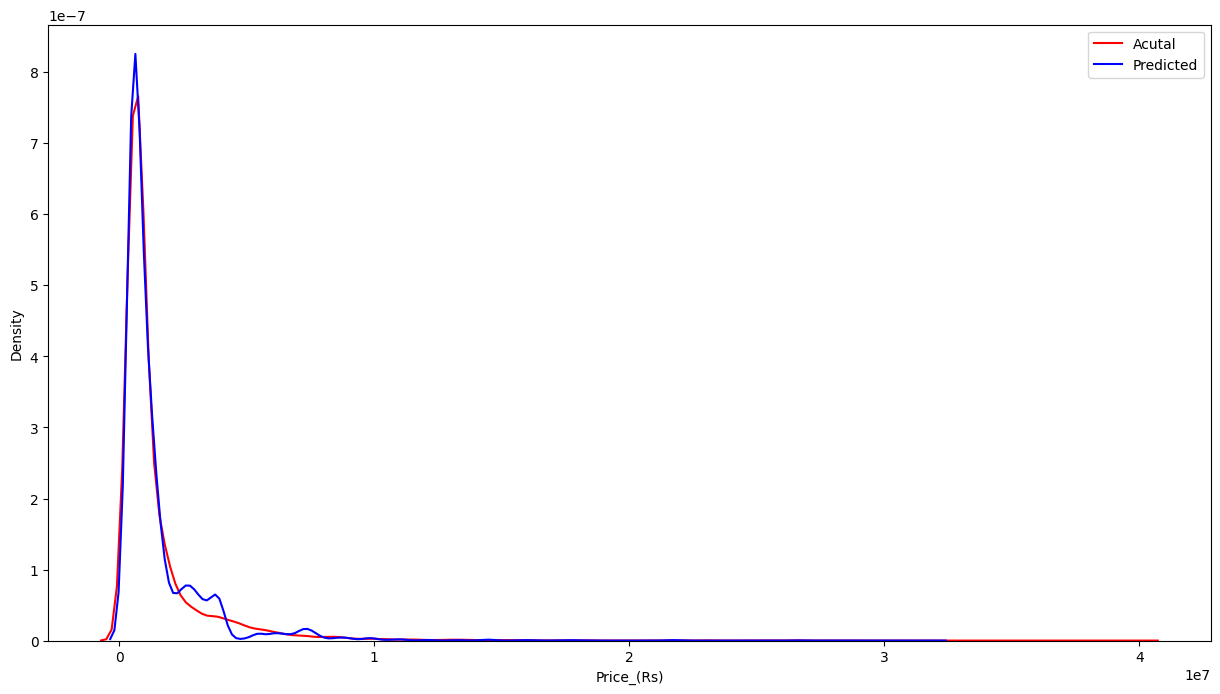

In [181]:
plt.figure(figsize = (15,8))
ax1 = sns.kdeplot(df_new['Price_(Rs)'],color="r", label="Acutal")
sns.kdeplot(df_new['Y'],color="b",ax=ax1, label="Predicted")
plt.legend(loc="upper right")
    
plt.show()

## CONCLUSION

* <p>Comparing all the tested models, <b>the RIDGE REGRESSION model is still the best </b> to predict price from the dataset. 
* Considering cars beyond 2015 has improved our model prediction efficiency.